In [ ]:
!pip install visualkeras

from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
import visualkeras
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 5.6 MB/s eta 0:00:00
Mounted at /content/gdrive


# Часть 1

Ссылка на датасет: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

## 1. Выполнить предварительную обработку, стандартизацию.

### Загрузка и описание датасета

In [ ]:
exam=pd.read_csv('gdrive/My Drive/StudentsPerformance.csv')

In [ ]:
exam.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Данный датасет содержит информацию о результатах сдачи экзаменов студентами.


---


**Описание столбцов:**

1. gender - пол студента
2. race/ethnicity - расу/этнос разбитые по группам
3. parental level of education - уровень образования родителей
4. lunch - какой завтрак был в день экзамена
5. test preparation course - был ли пройден подготовительный курс
6. math score - оценка за экзамен по математике
7. reading score - оценка за экзамен по чтению
8. writing score - оценка за экзамен по письму






### Информация о датасете

Была отображена информаия о столбцах.

In [ ]:
exam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


В данном датасете 1000 записей и 8 столбцов.

Можно заметить, что в столбцах нет пропущенных значений.

Типы данных для каждого столбца указаны верно.

### Значения числовых столбцов датасета

In [ ]:
exam.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


На основе таблицы данных можно сказать, что средняя оценка по математике - 66.

Диапазон оценок от 0 до 100.

Также можно выяснить максимальные, средние и минимальные значения для всех остальных экзаменов.

### Поиск явных дубликатов

Было выведено количество явных дубликатов.

In [ ]:
exam.duplicated().sum()

0

Явных дубликатов не обнаружено.

### Замена строковых значений на числовые, корректировка типов данных и поиск неявных дубликатов.

In [ ]:
print(exam['gender'].unique())
exam['gender'] = exam['gender'].replace(to_replace=['female', 'male'], value=[0, 1])
exam['gender'] = exam['gender'].astype(int)
print(exam['gender'].unique())

['female' 'male']
[0 1]


In [ ]:
print(exam['race/ethnicity'].unique())
exam['race/ethnicity'] = exam['race/ethnicity'].replace(to_replace=['group A', 'group B', 'group C', 'group D', 'group E'], value=[0, 1, 2, 3, 4])
exam['race/ethnicity'] = exam['race/ethnicity'].astype(int)
print(exam['race/ethnicity'].unique())

['group B' 'group C' 'group A' 'group D' 'group E']
[1 2 0 3 4]


In [ ]:
print(exam['parental level of education'].unique())
exam['parental level of education'] = exam['parental level of education'].replace(to_replace=["bachelor's degree", 'some college', "master's degree", "associate's degree", 'high school', 'some high school'], value=[0, 1, 2, 3, 4, 5])
exam['parental level of education'] = exam['parental level of education'].astype(int)
print(exam['parental level of education'].unique())

["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
[0 1 2 3 4 5]


In [ ]:
print(exam['lunch'].unique())
exam['lunch'] = exam['lunch'].replace(to_replace=['standard', 'free/reduced'], value=[0, 1])
exam['lunch'] = exam['lunch'].astype(int)
print(exam['lunch'].unique())

['standard' 'free/reduced']
[0 1]


In [ ]:
print(exam['test preparation course'].unique())
exam['test preparation course'] = exam['test preparation course'].replace(to_replace=['none', 'completed'], value=[0, 1])
exam['test preparation course'] = exam['test preparation course'].astype(int)
print(exam['test preparation course'].unique())

['none' 'completed']
[0 1]


Неявных дубликатов не обнаружено.

### Удаление ненужных для предсказания столбцов

Так как в ходе работы будут предсказываться оценки по экзамену по математике, оценки по другим экзаменам можно убрать из датасета.

In [ ]:
exam = exam.drop('reading score', axis=1)
exam = exam.drop('writing score', axis=1)

### Вывод предобработанного датасета

In [ ]:
exam.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score
0,0,1,0,0,0,72
1,0,2,1,0,1,69
2,0,1,2,0,0,90
3,1,0,3,1,0,47
4,1,2,1,0,0,76


In [ ]:
exam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   int64
 1   race/ethnicity               1000 non-null   int64
 2   parental level of education  1000 non-null   int64
 3   lunch                        1000 non-null   int64
 4   test preparation course      1000 non-null   int64
 5   math score                   1000 non-null   int64
dtypes: int64(6)
memory usage: 47.0 KB


Датафрейм и таблица выше показывают, что теперь все данные датасета являются числовыми, а также, что удалены столбцы с оценками по письму и чтению.

### Выбор целевой переменной и стандартизация данных

In [ ]:
y = exam['math score']
x = exam.drop('math score', axis=1)

Целевая переменная в данном случае - оценка за экзамен по математике. Она и будет пронозироваться.

Так как данные в датасете имеют разный диапазон, их нужно стандартизировать.

In [ ]:
scaler = StandardScaler() # создание

#StandardScaler используется для изменения размера распределения значений так, чтобы среднее значение наблюдаемых значений было равно 0, а стандартное отклонение – 1.

scaler.fit(x) # обучение

x = scaler.transform(x) # преобразование

## 2. Разделить набор на обучающие и валидационные данные.

Данные требуется случайно разделить на обучающую и тестовую выборки. 20% данных будут являться тестовыми, а остальные 80% - обучающими.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=33)

## 3. Создать последовательную модель с помощью Sequential, добавить слои с помощью Dense. Поэкспериментировать с количеством скрытых слоёв. На выходе - 1 нейрон, без функции активации.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(500, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(1)
])

В созданной модели присутствует 3 слоя: 1 входной, 1 скрытый и 1 выходной.

В нашем примере мы использовали слой **Dense** – полносвязный слой *(каждый нейрон данной слоя связан с каждым нейроном предыдущего/следующего слоя).*



*   Первый параметр слоя – **units**, данный параметр задаёт кол-во нейронов слое, в данном случае у первого слоя 500 нейронов, у второго 1000, у третьего 1.
*   Второй параметр **activation** – параметр, задающий функцию активации нейронов, у первого и второго слоя функция активации – Relu.
*   Крайний параметр **input_shape** – параметр, отвечающий за размер входных данных, в нашем случае на вход каждого нейрона первого слоя подаётся массив размера (800, 5). Наличие данного параметра указывает на то, что слой является входным, следовательно из-за наличия всего трёх слоёв, третий слой – выходной.




## 4. Вывести model.summary() и прокомментировать результат.

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               3000      
                                                                 
 dense_1 (Dense)             (None, 1000)              501000    
                                                                 
 dense_2 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 505001 (1.93 MB)
Trainable params: 505001 (1.93 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None



*   Model - название модели
*   Layer - название и тип слоя
*   Output Shape - размер данных на выход из слоя
*   Param - количество параметров

Общее количесто параметров = 505001.

Количество тренируемых параметров = 505001.

### Визуализация архитектуры нейронной сети

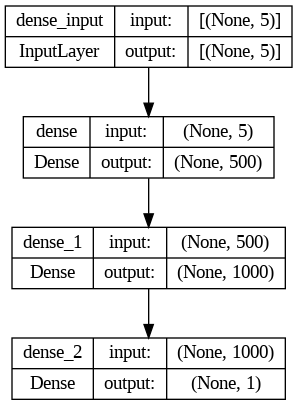

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
visualkeras.layered_view(model)

## 5. Задать параметры в compile (в качестве loss можно использовать mse, в качестве метрики - mae. Можете также поэкспериментировать с моделью, метриками и выбрать наиболее подходящую.

Были заданы обучающие параметры

In [ ]:
model.compile(loss="mse", optimizer="adam", metrics=["mae"])



* Параметр **loss** – ошибка между результатом, выдаваемым моделью и реальным значением, по сути - это цель, которую модель пытается свести к минимуму, например, categorical_crossentropy или mse.
* **optimizer** – алгоритм по которому будет проводится обновление синапсов нейронов,
* **metrics** – метрики, которые будут выводится при обучении модели, нужны для оценки качества обучения

## 6. Обучить модель с помощью fit.

Было произведено обучение модели на тестовой выборке.

In [ ]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
25/25 [==============================] - 1s 17ms/step - loss: 3180.4382 - mae: 53.2013 - val_loss: 1342.3936 - val_mae: 33.6894
Epoch 2/5
25/25 [==============================] - 0s 12ms/step - loss: 461.8232 - mae: 17.0002 - val_loss: 218.1275 - val_mae: 11.9620
Epoch 3/5
25/25 [==============================] - 0s 10ms/step - loss: 221.5253 - mae: 11.9605 - val_loss: 204.4308 - val_mae: 11.5241
Epoch 4/5
25/25 [==============================] - 0s 11ms/step - loss: 203.2455 - mae: 11.4615 - val_loss: 200.2109 - val_mae: 11.4186
Epoch 5/5
25/25 [==============================] - 0s 12ms/step - loss: 196.4967 - mae: 11.3181 - val_loss: 186.9330 - val_mae: 10.9563




*   x_train – Numpy массив, содержащий в себе обучающую выборку

*   y_train - Numpy массив, содержащий разметку данных для x_train (верные ответы), (если несколько выходов - список массивов)

*   epoch – кол-во эпох для обучения модели. В данном случае, количество эпох равно пяти.

Были выведены метрики модели.

In [ ]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 186.9330 - mae: 10.9563


[186.93301391601562, 10.956329345703125]

Loss рассчитывается по формуле mse. Среднеквадратичная ошибка (Mean Squared Error) – Среднее арифметическое (Mean) квадратов разностей между предсказанными и реальными значениями Модели (Model) Машинного обучения.


Метрика mae(Средняя абсолютная ошибка) рассчитывается как среднее абсолютных разностей между целевыми значением и значением, предсказанным моделью на данном обучающем примере в процессе обучения.

## 7. Выполнить предсказание на валидационных данных.

Была произведена проверка работоспособности модели, используя метод `predict()`.

In [ ]:
y_pred = model.predict(x_test)

7/7 [==============================] - 0s 5ms/step


## 8. Создать датафрайм с истинными и предсказанными значениями.

Был создан датафрейм реальных и предсказанных данных

In [ ]:
result_df = pd.DataFrame({'True_Score': y_test, 'Predicted_Score': y_pred.flatten()})
print(result_df)

     True_Score  Predicted_Score
286          97        80.823990
402          49        57.860912
253          80        69.632736
4            76        66.733055
372          74        75.471016
..          ...              ...
358          59        63.080151
626          69        58.269588
207          81        82.653305
714          60        67.020187
122          88        70.795609

[200 rows x 2 columns]


По таблице видно, что значения отклоняются в среднем на 10%.

## 9. Построить график правильных и предсказанных значений (как в ЛР№3 курса Введение в анализ данных).

Text(0, 0.5, 'Предсказанные значения')

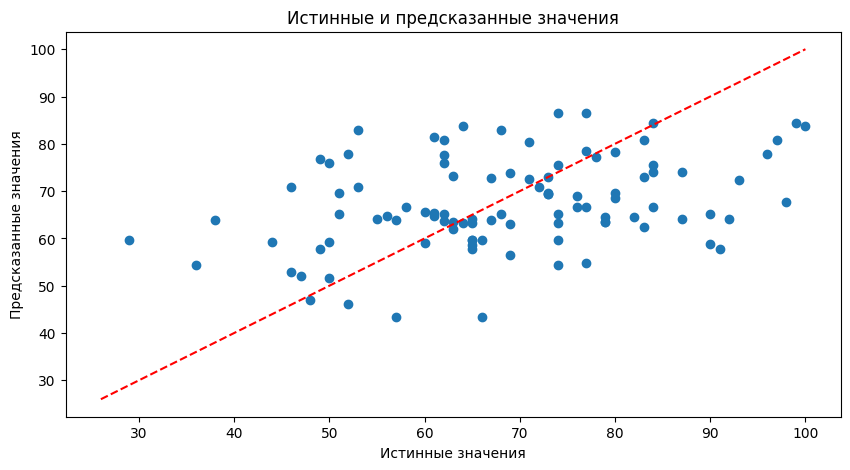

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(result_df['True_Score'][:100], result_df['Predicted_Score'][:100])
plt.plot([min(result_df['True_Score']), max(result_df['True_Score'])],
         [min(result_df['True_Score']), max(result_df['True_Score'])],
         color='red', linestyle='--', label='Линия идеального совпадения')
plt.title('Истинные и предсказанные значения')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')

На основе полученного графика можно сделать вывод что нейронная сеть достаточно точно предсказывает оценку по экзамену.

## 10. Построить график ошибок на обучающем и валидационном наборе по эпохам обучения.

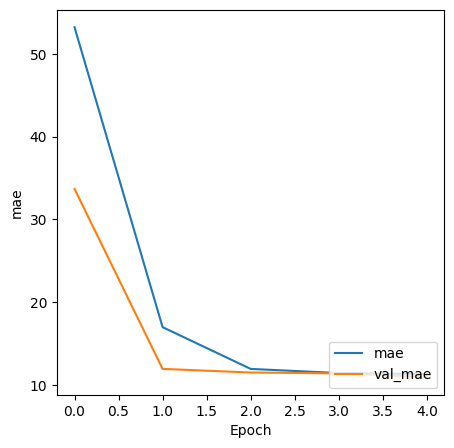

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label = 'val_mae')
plt.xlabel('Epoch')
plt.ylabel('mae')
plt.legend(loc='lower right')

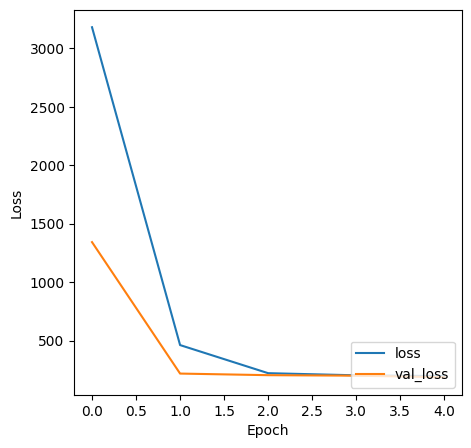

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

На полученных графиках можно заметить, что с увеличением количества эпох - метрики Loss и MAE начинают расти медленнее. Оптимальное количество эпох - 3.

# Часть 2

**Вариант 1. Набор данных 1heart.csv**

## Предобработка данных

Требуется провести предобработку данных. Вначале были выписаны все столбцы датасета и указана информация, что означает каждый из них.

Датасет содержит информацию о сердечных болезнях

1. возраст
2. пол
3. тип боли в груди *(4 значения [TA: типичная стенокардия, ATA: атипичная стенокардия, NAP: неангинальная боль, ASY: бессимптомная])*
4. артериальное давление в покое
5. холестерин сыворотки в мг/дл
6. уровень сахара в крови натощак > 120 мг/дл
7. ЭКГ в покое: результаты электрокардиограммы в покое (*норма: нормальная, ST: аномалия ST-T LVN: гипертрофия)*
8. MaxHR: максимальная достигнутая частота сердечных сокращений *[Числовое значение от 60 до 202]*
9. стенокардия, вызванная физической нагрузкой *(да, нет)*
10. oldpeak = депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя
11. наклон пикового сегмента ST при нагрузке *(Вверх: восходящий, Плоский: плоский, Вниз: нисходящий)*
12. HeartDisease: *выходной класс [1: болезнь сердца, 0: нормальный]*

In [ ]:
heart = pd.read_csv('gdrive/My Drive/1heart.csv')
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160.0,180,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130.0,283,0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,138.0,214,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150.0,195,0,Normal,122.0,N,0.0,Up,0


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             925 non-null    int64  
 1   Sex             925 non-null    object 
 2   ChestPainType   925 non-null    object 
 3   RestingBP       923 non-null    float64
 4   Cholesterol     924 non-null    object 
 5   FastingBS       925 non-null    int64  
 6   RestingECG      924 non-null    object 
 7   MaxHR           924 non-null    float64
 8   ExerciseAngina  925 non-null    object 
 9   Oldpeak         925 non-null    float64
 10  ST_Slope        925 non-null    object 
 11  HeartDisease    925 non-null    int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 86.8+ KB


В датасете 925 записей и 12 столбцов.



In [ ]:
heart.describe()

,Age,RestingBP,FastingBS,MaxHR,Oldpeak,HeartDisease
count,925.000000,923.000000,925.000000,924.000000,925.000000,925.000000
mean,53.451892,132.442037,0.231351,136.979437,0.882162,0.550270
std,9.453069,18.464707,0.421925,25.507091,1.064803,0.497736
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,0.000000,138.000000,0.500000,1.000000
75%,60.000000,140.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,1.000000,202.000000,6.200000,1.000000


На основе таблицы данных можно сказать, что средний возраст пациентов - 53 года, немного больше половины имеют заболевание сердца. Также можно выяснить максимальные, средние и минимальные значения для таких показателей, как возраст, артериальное давление в покое, уровень сахара в крови натощак, максимальная достигнутая частота сердечных сокращений, депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя.

In [ ]:
heart.isna().sum() #подсчет количества пропусков

Age               0
Sex               0
ChestPainType     0
RestingBP         2
Cholesterol       1
FastingBS         0
RestingECG        1
MaxHR             1
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

В датасете в некоторых колонках присутствуют пропуски. Так как все данные, замененные 0 в числовых ячейках повлияют на кластеризацию. Производится удаление всех пустых записей. А затем подсчет количества пропусков для проверки удаления.

In [ ]:
heart.dropna(inplace=True)
#Параметр inplace определяет, нужно ли вносить изменения в существующий датафрейм или нужно вернуть его копию.
#По умолчанию значение inplace — False (возвращается копия). У нас inplace=True для внесения изменений на месте

In [ ]:
heart.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Все пропуски данных были успешно удалены.

In [ ]:
heart.duplicated().sum() # подсчет количества дубликатов

3

Так как обнаружены дубликаты, они удаляются и осуществляется проверка удаления.

In [ ]:
heart = heart.drop_duplicates() # удаление дубликатов
heart.duplicated().sum()

0

Все явные дубликаты устранены.

In [ ]:
heart.reset_index(drop=True, inplace=True) # обновление индексации; аргумент drop, чтобы не создавать столбец index

Для каждого текстового столбца осуществляется поиск уникальных значений и при наличии дубликатов устранение их.

In [ ]:
print(heart['Sex'].unique()) # Поиск уникальных значений в столбце "Sex"

['M' 'F' 'Ma']


Обнаружены дубликаты. Необходимо заменить 'Ma' на 'М'. Также осуществляется проверка.

In [ ]:
heart['Sex'].replace('Ma', 'M', inplace=True)
print(heart['Sex'].unique()) # Поиск уникальных значений в столбце "Sex"

['M' 'F']


<ipython-input-606-edb97012f2fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart['Sex'].replace('Ma', 'M', inplace=True)


Успешное устранение.

In [ ]:
print(heart['ChestPainType'].unique()) # Поиск уникальных значений в столбце "ChestPainType"

['ATA' 'NAP' 'ASY' 'TA']


Дубликаты не обнаружены.

In [ ]:
print(heart['Cholesterol'].unique()) # Поиск уникальных значений в столбце "Cholesterol"

['289' '180' '283' '214' '195' '339' '237' '208' '207' '284' '211' '164'
 '204' '234' '273' '196' '248' '267' '223' '184' '201' '288' '209' '260'
 '468' '188' '518' '167' '224' '172' '186' '254' '306' '250' '177' '227'
 '230' '294' '264' '259' '175' '318' '216' '340' '233' '205' '245' '194'
 '270' '213' '365' '342' '253' '277' '202' '297' '225' '246' '412' '265'
 '215' '182' '218' '268' '163' '529' '100' '206' '238' '139' '263' '291'
 '229' '307' '210' '329' '147' '85' '269' '275' '179' '392' '466' '129'
 '241' '255' '276' '282' '338' '160' '156' '272' '240' '393' '161' '228'
 '292' '388' '166' '247' '331' '341' '243' '279' '198' '249' '168' '603'
 '159' '190' '185' '290' '212' '231' '222' '235' '320' '187' '266' '287'
 '404' '312' '251' '328' '285' '280' '192' '193' '308' '219' '257' '132'
 '226' '217' '303' '298' '256' '117' '295' '173' '315' '281' '309' '200'
 '336' '355' '326' '171' '491' '271' '274' '394' '221' '126' '305' '220'
 '242' '347' '344' '358' '169' '181' '0' '236' '203'

Так как это числа, данные не нуждаются в вычислении дубликатов. Однако есть числа с буквами, которые стоит заменить. Также сделана проверка для того, чтобы убедиться в корректной замене.

In [ ]:
heart['Cholesterol'].replace('a241', '241', inplace=True)
print(heart['Cholesterol'].unique()) # Поиск уникальных значений в столбце "Cholesterol"

['289' '180' '283' '214' '195' '339' '237' '208' '207' '284' '211' '164'
 '204' '234' '273' '196' '248' '267' '223' '184' '201' '288' '209' '260'
 '468' '188' '518' '167' '224' '172' '186' '254' '306' '250' '177' '227'
 '230' '294' '264' '259' '175' '318' '216' '340' '233' '205' '245' '194'
 '270' '213' '365' '342' '253' '277' '202' '297' '225' '246' '412' '265'
 '215' '182' '218' '268' '163' '529' '100' '206' '238' '139' '263' '291'
 '229' '307' '210' '329' '147' '85' '269' '275' '179' '392' '466' '129'
 '241' '255' '276' '282' '338' '160' '156' '272' '240' '393' '161' '228'
 '292' '388' '166' '247' '331' '341' '243' '279' '198' '249' '168' '603'
 '159' '190' '185' '290' '212' '231' '222' '235' '320' '187' '266' '287'
 '404' '312' '251' '328' '285' '280' '192' '193' '308' '219' '257' '132'
 '226' '217' '303' '298' '256' '117' '295' '173' '315' '281' '309' '200'
 '336' '355' '326' '171' '491' '271' '274' '394' '221' '126' '305' '220'
 '242' '347' '344' '358' '169' '181' '0' '236' '203'

<ipython-input-609-c4770024f61a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart['Cholesterol'].replace('a241', '241', inplace=True)


Неявные дубликаты устранены.

In [ ]:
print(heart['RestingECG'].unique()) # Поиск уникальных значений в столбце "RestingECG"

['Normal' 'ST' 'LVH']


Дубликаты не обнаружены.

In [ ]:
print(heart['ExerciseAngina'].unique()) # Поиск уникальных значений в столбце "ExerciseAngina"

['N' 'Y']


Дубликаты не обнаружены.

In [ ]:
print(heart['ST_Slope'].unique()) # Поиск уникальных значений в столбце "ST_Slope"

['Up' 'Flat' 'Down' 'UP']


Обнаружен дубликат. Нужно 'UP' заменит на 'Up'. После замены осуществляется проверка.

In [ ]:
heart['ST_Slope'].replace('UP', 'Up', inplace=True)
print(heart['ST_Slope'].unique()) # Поиск уникальных значений в столбце "ST_Slope"

['Up' 'Flat' 'Down']


<ipython-input-613-ff4d9d5724b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart['ST_Slope'].replace('UP', 'Up', inplace=True)


Дубликат устранен.

Ранее было замечено несоответствие данных колонки "Cholesterol" типу текстовому. Соответственно требуется изменить его на float. После изменения производится проверка.

In [ ]:
heart['Cholesterol'] = heart['Cholesterol'].astype(float)
heart['Cholesterol'].dtypes

<ipython-input-614-8f4eb68fdc67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart['Cholesterol'] = heart['Cholesterol'].astype(float)


dtype('float64')

Тип успешно изменен.

## Замена строковых значений на числовые.

In [ ]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122.0,N,0.0,Up,0


In [ ]:
print(heart['Sex'].unique())
heart['Sex'] = heart['Sex'].replace(to_replace=['M', 'F'], value=[0, 1]) # замена числовых значений на текстовые
print(heart['Sex'].unique())

['M' 'F']
[0 1]


In [ ]:
print(heart['ChestPainType'].unique())
heart['ChestPainType'] = heart['ChestPainType'].replace(to_replace=['ATA', 'NAP', 'ASY', 'TA'], value=[0, 1, 2, 3]) # замена числовых значений на текстовые
print(heart['ChestPainType'].unique())

['ATA' 'NAP' 'ASY' 'TA']
[0 1 2 3]


In [ ]:
print(heart['RestingECG'].unique())
heart['RestingECG'] = heart['RestingECG'].replace(to_replace=['Normal', 'ST', 'LVH'], value=[0, 1, 2]) # замена числовых значений на текстовые
print(heart['RestingECG'].unique())

['Normal' 'ST' 'LVH']
[0 1 2]


In [ ]:
print(heart['ExerciseAngina'].unique())
heart['ExerciseAngina'] = heart['ExerciseAngina'].replace(to_replace=['N', 'Y'], value=[0, 1]) # замена числовых значений на текстовые
print(heart['ExerciseAngina'].unique())

['N' 'Y']
[0 1]


In [ ]:
print(heart['ST_Slope'].unique())
heart['ST_Slope'] = heart['ST_Slope'].replace(to_replace=['Up', 'Flat', 'Down'], value=[0, 1, 2]) # замена числовых значений на текстовые
print(heart['ST_Slope'].unique())

['Up' 'Flat' 'Down']
[0 1 2]


In [ ]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140.0,289.0,0,0,172.0,0,0.0,0,0
1,49,1,1,160.0,180.0,0,0,156.0,0,1.0,1,1
2,37,0,0,130.0,283.0,0,1,98.0,0,0.0,0,0
3,48,1,2,138.0,214.0,0,0,108.0,1,1.5,1,1
4,54,0,1,150.0,195.0,0,0,122.0,0,0.0,0,0


Датафрейм выше показывает, что теперь все данные датасета являются числовыми.

## Выбор целевой переменной и стандартизация данных

Целевой переменной данного датафрейма является 'HeartDisease', которая показывает, есть ли у человека сердечное заболевание или нет.

In [ ]:
y = heart['HeartDisease']
x = heart.drop('HeartDisease', axis=1)

Так как данные в датасете имеют разный диапазон, их нужно стандартизировать.

In [ ]:
scaler = StandardScaler() # создание

#StandardScaler используется для изменения размера распределения значений так, чтобы среднее значение наблюдаемых значений было равно 0, а стандартное отклонение – 1.

scaler.fit(x) # обучение

x = scaler.transform(x) # преобразование

## Разделение данных на тестовую и тренировочную выборки

Данные требуется случайно разделить на обучающую и тестовую выборки. 20% данных будут являться тестовыми, а остальные 80% - обучающими.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=33)

## Создание модели

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

В созданной модели присутствует 2 слоя: 1 входной и 1 выходной.

В данном примере был использован слой **Dense** – полносвязный слой *(каждый нейрон данной слоя связан с каждым нейроном предыдущего/следующего слоя).*



*   Первый параметр слоя – **units**, данный параметр задаёт кол-во нейронов слое, в данном случае у первого слоя 16 нейронов, у второго 1.
*   Второй параметр **activation** – параметр, задающий функцию активации нейронов, у первого функция активации relu, у второго – sigmoid.
*   Крайний параметр **input_shape** – параметр, отвечающий за размер входных данных, в нашем случае на вход каждого нейрона первого слоя подаётся массив размера (734, 11). Наличие данного параметра указывает на то, что слой является входным, следовательно из-за наличия всего двух слоёв, второй слой – выходной.




## Вывод информации о модели

In [ ]:
print(model.summary())

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 16)                192       
                                                                 
 dense_35 (Dense)            (None, 1)                 17        
                                                                 
Total params: 209 (836.00 Byte)
Trainable params: 209 (836.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


*   Model - название модели
*   Layer - название и тип слоя
*   Output Shape - размер данных на выход из слоя
*   Param - количество параметров

Общее количесто параметров = 209.

Количество тренируемых параметров = 209.

### Визуализация архитектуры нейронной сети

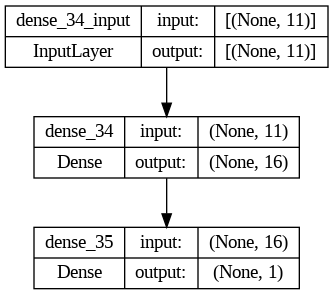

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
visualkeras.layered_view(model)

## Определение параметров compile

Были заданы обучающие параметры

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy", "mae"])
# функция binary_crossentropy используется потому, что в исходных данных представлено 2 класса.


* Параметр loss – ошибка между результатом, выдаваемым моделью и реальным значением, по сути - это цель, которую модель пытается свести к минимуму, например, categorical_crossentropy или mse.
* optimizer – алгоритм по которому будет проводится обновление синапсов нейронов,
* metrics – метрики, которые будут выводится при обучении модели, нужны для оценки качества обучения

## Обучение модели, с помощью fit.

Было произведено обучение модели на тестовой выборке.

In [ ]:
history = model.fit(x_train, y_train, epochs=150, validation_data=(x_test, y_test))

Epoch 1/150
23/23 [==============================] - 1s 8ms/step - loss: 0.7039 - accuracy: 0.5300 - mae: 0.4724 - val_loss: 0.6513 - val_accuracy: 0.5326 - val_mae: 0.4468
Epoch 2/150
23/23 [==============================] - 0s 2ms/step - loss: 0.6320 - accuracy: 0.6335 - mae: 0.4384 - val_loss: 0.5945 - val_accuracy: 0.6576 - val_mae: 0.4161
Epoch 3/150
23/23 [==============================] - 0s 2ms/step - loss: 0.5745 - accuracy: 0.7262 - mae: 0.4067 - val_loss: 0.5517 - val_accuracy: 0.7174 - val_mae: 0.3898
Epoch 4/150
23/23 [==============================] - 0s 3ms/step - loss: 0.5285 - accuracy: 0.7643 - mae: 0.3785 - val_loss: 0.5169 - val_accuracy: 0.7663 - val_mae: 0.3659
Epoch 5/150
23/23 [==============================] - 0s 4ms/step - loss: 0.4919 - accuracy: 0.8052 - mae: 0.3530 - val_loss: 0.4887 - val_accuracy: 0.7826 - val_mae: 0.3441
Epoch 6/150
23/23 [==============================] - 0s 3ms/step - loss: 0.4633 - accuracy: 0.8147 - mae: 0.3311 - val_loss: 0.4665 - v



* x_train – Numpy массив, содержащий в себе обучающую выборку

* y_train - Numpy массив, содержащий разметку данных для x_train (верные ответы), (если несколько выходов - список массивов)

* epoch – кол-во эпох для обучения модели. В данном случае, количество эпох равно пяти.



## Вывод точности модели

Были выведены метрики модели.

In [ ]:
model.evaluate(x_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.3640 - accuracy: 0.8424 - mae: 0.2089


[0.3639616370201111, 0.842391312122345, 0.20893943309783936]



Loss рассчитывается по формуле mse. Среднеквадратичная ошибка (Mean Squared Error) – Среднее арифметическое (Mean) квадратов разностей между предсказанными и реальными значениями Модели (Model) Машинного обучения.


Метрика mae(Средняя абсолютная ошибка) рассчитывается как среднее абсолютных разностей между целевыми значением и значением, предсказанным моделью на данном обучающем примере в процессе обучения.


Accuracy(Точность) показывает насколько хорошо модель предсказывает значения. 83% является высоким показателем.

## Совершение предсказания

Была произведена проверка работоспособности модели, используя метод predict().

In [ ]:
y_pred = model.predict(x_test)

6/6 [==============================] - 0s 1ms/step


## Сравнение истинных и предсказанных значений

Был создан датафрейм реальных и предсказанных данных

In [ ]:
result_df = pd.DataFrame({'True_Score': y_test, 'Predicted_Score': y_pred.flatten()})
print(result_df)

     True_Score  Predicted_Score
596           1         0.592767
412           1         0.998542
180           1         0.966920
439           1         0.980279
849           0         0.089593
..          ...              ...
378           1         0.989210
847           0         0.670315
257           0         0.003933
686           0         0.591995
652           0         0.380330

[184 rows x 2 columns]


По таблице видно, что модель достаточно точно угадывает значения.

## График метрики качества по эпохам

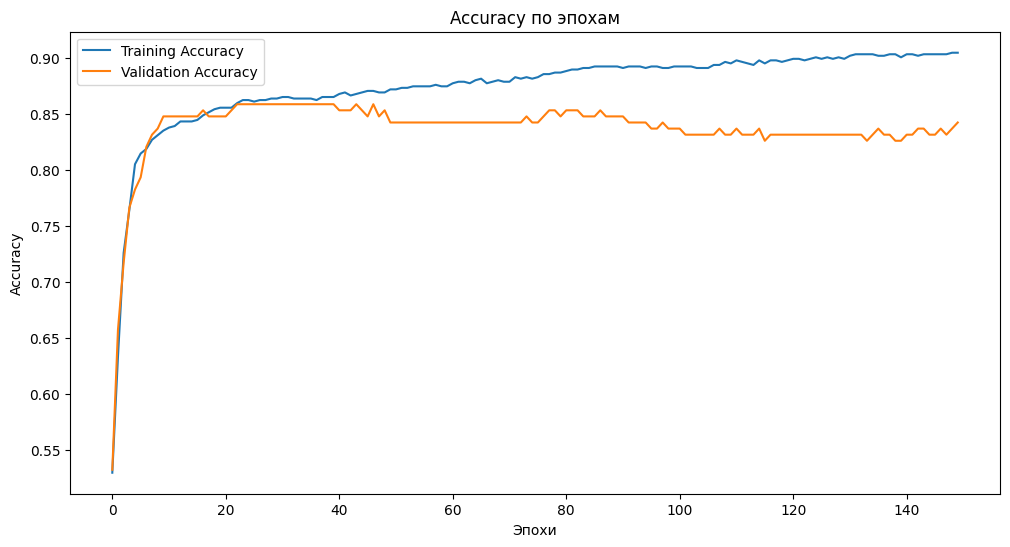

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy по эпохам')
plt.xlabel('Эпохи')
plt.ylabel('Accuracy')
plt.legend()

На основе полученного графика можно сделать вывод, что для данной задачи при увеличении количества эпох точность предсказаний также резко увеличивается до 10 эпохи, после чего продолжается медленный рост тренировочной точности, но точность предсказания практически не изменяется.

## Графики метрик ошибок по эпохам

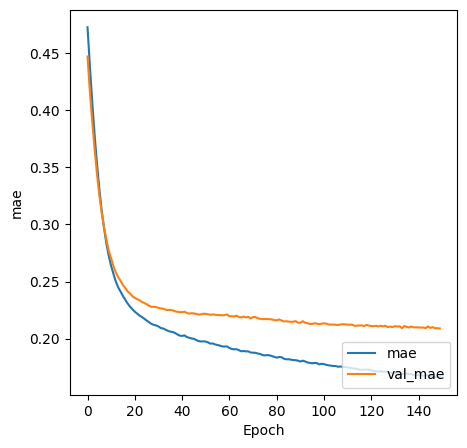

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label = 'val_mae')
plt.xlabel('Epoch')
plt.ylabel('mae')
plt.legend(loc='lower right')

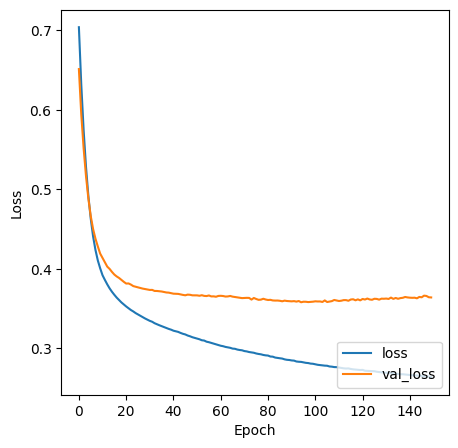

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

На полученных графиках можно заметить, что с увеличением количества эпох - метрики Loss и MAE начинают убывать медленнее. Можно заметить по графику Loss/Epoch, что после 60 эпохи происходит переобучение модели. Следовательно оптимальное количество эпох равно 60.

## График ROC-кривой

ROC-кривая описывает взаимосвязь между чувствительностью модели (TPR, или true positives rate — доля истинно положительных примеров) и её специфичностью (описываемой в отношении долей ложноположительных результатов: 1-FPR).

TPR, или чувствительность модели, является соотношением корректных классификаций положительного класса, разделённых на все положительные классы, доступные из набора данных.

FPR — доля ложноположительных примеров, false positives rate. Это соотношение между ложными срабатываниями (количество прогнозов, ошибочно отнесённых в положительные), и всеми доступными отрицательными классами.

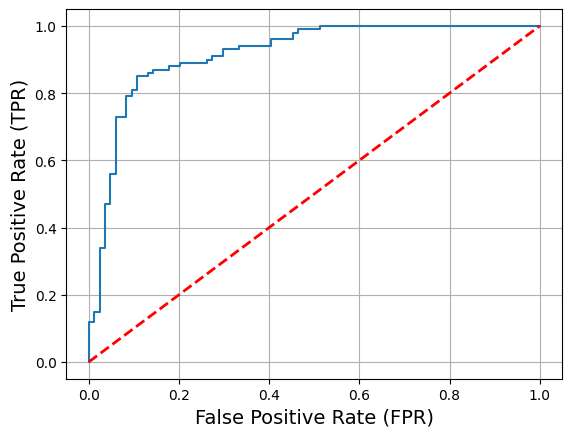

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.grid(True)
plt.show()

По графику видно, что доля правильно угаданных значений резко увеличивается, по сравнению с ложно угаданными значениями, что является доказательством корректной работы модели.

# Дополнительное задание

## 1. Модель из первой части, но с большим количеством эпох

In [ ]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(500, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(1)
])

В созданной модели присутствует 3 слоя: 1 входной, 1 скрытый и 1 выходной.

В нашем примере мы использовали слой **Dense** – полносвязный слой *(каждый нейрон данной слоя связан с каждым нейроном предыдущего/следующего слоя).*



*   Первый параметр слоя – **units**, данный параметр задаёт кол-во нейронов слое, в данном случае у первого слоя 500 нейронов, у второго 1000, у третьего 1.
*   Второй параметр **activation** – параметр, задающий функцию активации нейронов, у первого и второго слоя функция активации – Relu.
*   Крайний параметр **input_shape** – параметр, отвечающий за размер входных данных, в нашем случае на вход каждого нейрона первого слоя подаётся массив размера (800, 5). Наличие данного параметра указывает на то, что слой является входным, следовательно из-за наличия всего трёх слоёв, третий слой – выходной.




### Вывести model.summary() и прокомментировать результат.

In [ ]:
model1.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 500)               3000      
                                                                 
 dense_71 (Dense)            (None, 1000)              501000    
                                                                 
 dense_72 (Dense)            (None, 1)                 1001      
                                                                 
Total params: 505001 (1.93 MB)
Trainable params: 505001 (1.93 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



*   Model - название модели
*   Layer - название и тип слоя
*   Output Shape - размер данных на выход из слоя
*   Param - количество параметров

Общее количесто параметров = 505001.

Количество тренируемых параметров = 505001.

### Визуализация архитектуры нейронной сети

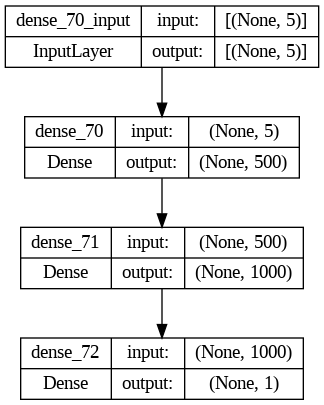

In [ ]:
plot_model(model1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
visualkeras.layered_view(model1)

### Задать параметры в compile (в качестве loss можно использовать mse, в качестве метрики - mae. Можете также поэкспериментировать с моделью, метриками и выбрать наиболее подходящую.

Были заданы обучающие параметры

In [ ]:
model1.compile(loss="mse", optimizer="adam", metrics=["mae"])



* Параметр **loss** – ошибка между результатом, выдаваемым моделью и реальным значением, по сути - это цель, которую модель пытается свести к минимуму, например, categorical_crossentropy или mse.
* **optimizer** – алгоритм по которому будет проводится обновление синапсов нейронов,
* **metrics** – метрики, которые будут выводится при обучении модели, нужны для оценки качества обучения

### Обучить модель с помощью fit.

Было произведено обучение модели на тестовой выборке.

In [ ]:
history1 = model1.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
25/25 [==============================] - 1s 9ms/step - loss: 3195.9382 - mae: 53.5073 - val_loss: 1377.4608 - val_mae: 34.3433
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 479.2253 - mae: 17.5808 - val_loss: 220.4304 - val_mae: 11.8869
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 222.2957 - mae: 12.0141 - val_loss: 205.6590 - val_mae: 11.5567
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 204.2549 - mae: 11.5152 - val_loss: 197.9039 - val_mae: 11.3643
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 197.7354 - mae: 11.3027 - val_loss: 190.9481 - val_mae: 11.1364
Epoch 6/100
25/25 [==============================] - 0s 6ms/step - loss: 192.4476 - mae: 11.1851 - val_loss: 184.2010 - val_mae: 10.8610
Epoch 7/100
25/25 [==============================] - 0s 6ms/step - loss: 188.7363 - mae: 11.0371 - val_loss: 183.6889 - val_mae: 10.9221
Epoch 8/100
25/25 [====================



*   x_train – Numpy массив, содержащий в себе обучающую выборку

*   y_train - Numpy массив, содержащий разметку данных для x_train (верные ответы), (если несколько выходов - список массивов)

*   epoch – кол-во эпох для обучения модели. В данном случае, количество эпох равно 100.

Были выведены метрики модели.

In [ ]:
model1.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 170.0439 - mae: 10.4818


[170.04388427734375, 10.48178482055664]

Loss рассчитывается по формуле mse. Среднеквадратичная ошибка (Mean Squared Error) – Среднее арифметическое (Mean) квадратов разностей между предсказанными и реальными значениями Модели (Model) Машинного обучения.


Метрика mae(Средняя абсолютная ошибка) рассчитывается как среднее абсолютных разностей между целевыми значением и значением, предсказанным моделью на данном обучающем примере в процессе обучения.

### Выполнить предсказание на валидационных данных.

Была произведена проверка работоспособности модели, используя метод `predict()`.

In [ ]:
y_pred1 = model1.predict(x_test)

7/7 [==============================] - 0s 2ms/step


### Создать датафрайм с истинными и предсказанными значениями.

Был создан датафрейм реальных и предсказанных данных

In [ ]:
result_df1 = pd.DataFrame({'True_Score': y_test, 'Predicted_Score': y_pred1.flatten()})
result_df1

## 2. Модель из первой части, но с двумя слоями (входным и выходным)

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(500, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(1)
])

В созданной модели присутствует 2 слоя: 1 входной и 1 выходной.

В нашем примере мы использовали слой **Dense** – полносвязный слой *(каждый нейрон данной слоя связан с каждым нейроном предыдущего/следующего слоя).*



*   Первый параметр слоя – **units**, данный параметр задаёт кол-во нейронов слое, в данном случае у первого слоя 500 нейронов, у второго 1.
*   Второй параметр **activation** – параметр, задающий функцию активации нейронов, у первого и второго слоя функция активации – Relu.
*   Крайний параметр **input_shape** – параметр, отвечающий за размер входных данных, в нашем случае на вход каждого нейрона первого слоя подаётся массив размера (800, 5). Наличие данного параметра указывает на то, что слой является входным, следовательно из-за наличия всего двух слоёв, второй слой – выходной.




### Вывести model.summary() и прокомментировать результат.

In [ ]:
model2.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_73 (Dense)            (None, 500)               3000      
                                                                 
 dense_74 (Dense)            (None, 1)                 501       
                                                                 
Total params: 3501 (13.68 KB)
Trainable params: 3501 (13.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



*   Model - название модели
*   Layer - название и тип слоя
*   Output Shape - размер данных на выход из слоя
*   Param - количество параметров

Общее количесто параметров = 3501.

Количество тренируемых параметров = 3501.

### Визуализация архитектуры нейронной сети

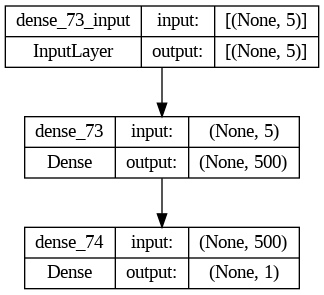

In [ ]:
plot_model(model2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
visualkeras.layered_view(model2)

### Задать параметры в compile (в качестве loss можно использовать mse, в качестве метрики - mae. Можете также поэкспериментировать с моделью, метриками и выбрать наиболее подходящую.

Были заданы обучающие параметры

In [ ]:
model2.compile(loss="mse", optimizer="adam", metrics=["mae"])



* Параметр **loss** – ошибка между результатом, выдаваемым моделью и реальным значением, по сути - это цель, которую модель пытается свести к минимуму, например, categorical_crossentropy или mse.
* **optimizer** – алгоритм по которому будет проводится обновление синапсов нейронов,
* **metrics** – метрики, которые будут выводится при обучении модели, нужны для оценки качества обучения

### Обучить модель с помощью fit.

Было произведено обучение модели на тестовой выборке.

In [ ]:
history2 = model2.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
25/25 [==============================] - 1s 9ms/step - loss: 4424.5396 - mae: 64.7034 - val_loss: 4640.7861 - val_mae: 66.7048
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 4207.1265 - mae: 63.0175 - val_loss: 4385.7080 - val_mae: 64.7771
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 3921.5081 - mae: 60.7326 - val_loss: 4031.7207 - val_mae: 62.0081
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 3533.0850 - mae: 57.4800 - val_loss: 3562.1392 - val_mae: 58.1372
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 3040.7537 - mae: 53.0785 - val_loss: 2992.9331 - val_mae: 53.0735
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 2472.5081 - mae: 47.5279 - val_loss: 2368.8206 - val_mae: 46.8909
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 1882.0464 - mae: 41.0480 - val_loss: 1754.6327 - val_mae: 39.8693
Epoch 8/100
25/25 [========



*   x_train – Numpy массив, содержащий в себе обучающую выборку

*   y_train - Numpy массив, содержащий разметку данных для x_train (верные ответы), (если несколько выходов - список массивов)

*   epoch – кол-во эпох для обучения модели. В данном случае, количество эпох равно 100.

Были выведены метрики модели.

In [ ]:
model2.evaluate(x_test, y_test)

7/7 [==============================] - 0s 7ms/step - loss: 168.6198 - mae: 10.4363


[168.61981201171875, 10.436287879943848]

Loss рассчитывается по формуле mse. Среднеквадратичная ошибка (Mean Squared Error) – Среднее арифметическое (Mean) квадратов разностей между предсказанными и реальными значениями Модели (Model) Машинного обучения.


Метрика mae(Средняя абсолютная ошибка) рассчитывается как среднее абсолютных разностей между целевыми значением и значением, предсказанным моделью на данном обучающем примере в процессе обучения.

### Выполнить предсказание на валидационных данных.

Была произведена проверка работоспособности модели, используя метод `predict()`.

In [ ]:
y_pred2 = model2.predict(x_test)

7/7 [==============================] - 0s 2ms/step


### Создать датафрайм с истинными и предсказанными значениями.

Был создан датафрейм реальных и предсказанных данных

In [ ]:
result_df2 = pd.DataFrame({'True_Score': y_test, 'Predicted_Score': y_pred2.flatten()})
result_df2

## 3. Модель другой архитектуры с тремя слоями

In [ ]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(2000, activation='tanh', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(1200, activation='tanh'),
    tf.keras.layers.Dense(1)
])

В созданной модели присутствует 3 слоя: 1 входной, 1 скрытый и 1 выходной.

В нашем примере мы использовали слой **Dense** – полносвязный слой *(каждый нейрон данной слоя связан с каждым нейроном предыдущего/следующего слоя).*



*   Первый параметр слоя – **units**, данный параметр задаёт кол-во нейронов слое, в данном случае у первого слоя 2000 нейронов, у второго 1200, у третьего 1.
*   Второй параметр **activation** – параметр, задающий функцию активации нейронов, у первого и второго слоя функция активации – tanh.
*   Крайний параметр **input_shape** – параметр, отвечающий за размер входных данных, в нашем случае на вход каждого нейрона первого слоя подаётся массив размера (800, 5). Наличие данного параметра указывает на то, что слой является входным, следовательно из-за наличия всего трёх слоёв, третий слой – выходной.




### Вывести model.summary() и прокомментировать результат.

In [ ]:
model3.summary()

NameError: name 'model3' is not defined


*   Model - название модели
*   Layer - название и тип слоя
*   Output Shape - размер данных на выход из слоя
*   Param - количество параметров

Общее количесто параметров = 2414401.

Количество тренируемых параметров = 2414401.

### Визуализация архитектуры нейронной сети

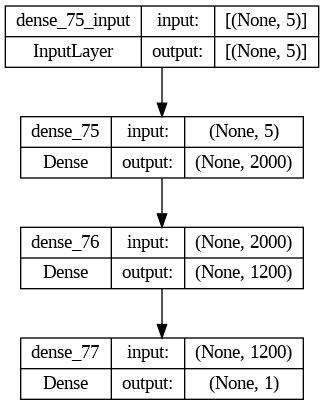

In [ ]:
plot_model(model3, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
visualkeras.layered_view(model3)

### Задать параметры в compile (в качестве loss можно использовать mse, в качестве метрики - mae. Можете также поэкспериментировать с моделью, метриками и выбрать наиболее подходящую.

Были заданы обучающие параметры

In [ ]:
model3.compile(loss="mse", optimizer="Adagrad", metrics=["mae"])



* Параметр **loss** – ошибка между результатом, выдаваемым моделью и реальным значением, по сути - это цель, которую модель пытается свести к минимуму, например, categorical_crossentropy или mse.
* **optimizer** – алгоритм по которому будет проводится обновление синапсов нейронов,
* **metrics** – метрики, которые будут выводится при обучении модели, нужны для оценки качества обучения

### Обучить модель с помощью fit.

Было произведено обучение модели на тестовой выборке.

In [ ]:
history3 = model3.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
25/25 [==============================] - 1s 37ms/step - loss: 4373.9170 - mae: 64.5447 - val_loss: 4380.6309 - val_mae: 64.9608
Epoch 2/100
25/25 [==============================] - 0s 18ms/step - loss: 3701.1860 - mae: 59.2721 - val_loss: 3380.2061 - val_mae: 56.7055
Epoch 3/100
25/25 [==============================] - 1s 30ms/step - loss: 2615.7817 - mae: 49.2465 - val_loss: 2193.9658 - val_mae: 45.0679
Epoch 4/100
25/25 [==============================] - 0s 16ms/step - loss: 1586.9875 - mae: 37.5028 - val_loss: 1298.1462 - val_mae: 33.7812
Epoch 5/100
25/25 [==============================] - 0s 15ms/step - loss: 918.2606 - mae: 27.3701 - val_loss: 777.2965 - val_mae: 25.1830
Epoch 6/100
25/25 [==============================] - 0s 20ms/step - loss: 562.7629 - mae: 20.4482 - val_loss: 501.9769 - val_mae: 19.4652
Epoch 7/100
25/25 [==============================] - 1s 23ms/step - loss: 381.2787 - mae: 16.1867 - val_loss: 355.8845 - val_mae: 15.9014
Epoch 8/100
25/25 [=======



*   x_train – Numpy массив, содержащий в себе обучающую выборку

*   y_train - Numpy массив, содержащий разметку данных для x_train (верные ответы), (если несколько выходов - список массивов)

*   epoch – кол-во эпох для обучения модели. В данном случае, количество эпох равно 100.

Были выведены метрики модели.

In [ ]:
model3.evaluate(x_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 161.3726 - mae: 10.3068


[161.3726043701172, 10.30683708190918]

Loss рассчитывается по формуле mse. Среднеквадратичная ошибка (Mean Squared Error) – Среднее арифметическое (Mean) квадратов разностей между предсказанными и реальными значениями Модели (Model) Машинного обучения.


Метрика mae(Средняя абсолютная ошибка) рассчитывается как среднее абсолютных разностей между целевыми значением и значением, предсказанным моделью на данном обучающем примере в процессе обучения.

### Выполнить предсказание на валидационных данных.

Была произведена проверка работоспособности модели, используя метод `predict()`.

In [ ]:
y_pred3 = model3.predict(x_test)

7/7 [==============================] - 0s 4ms/step


### Создать датафрайм с истинными и предсказанными значениями.

Был создан датафрейм реальных и предсказанных данных

In [ ]:
result_df3 = pd.DataFrame({'True_Score': y_test, 'Predicted_Score': y_pred3.flatten()})
result_df3

## Сравнение трёх моделей

### Датафрейм потерь и метрик

Был выведен датафрейм метрик и ошибок трёх полученных моделей.

In [ ]:
comparison_metrics_df = pd.DataFrame({'1 model': model1.evaluate(x_test, y_test), '2 model': model2.evaluate(x_test, y_test), '3 model': model3.evaluate(x_test, y_test)})
comparison_metrics_df.index = ['loss(mse)', 'mae']
comparison_metrics_df

7/7 [==============================] - 0s 4ms/step - loss: 161.3726 - mae: 10.3068


,1 model,2 model,3 model
loss(mse),170.043884,168.619812,161.372604
mae,10.481785,10.436288,10.306837


По данной таблице видно, что лучше всех себя показывает 3 модель. Её показатель потерь наиболее низкий, как и показатель средней абсолютной ошибки. Хуже всех себя показала 1 модель.

### Датафрейм истинных и предсказанных значений

Был выведен датафрейм сравнения истинных и предсказанных значений среди всех моделей.

In [ ]:
comparison_result_df = pd.DataFrame({'True_Score': y_test, 'Predicted_Score_1_model': y_pred1.flatten(), 'Predicted_Score_2_model': y_pred2.flatten(), 'Predicted_Score_3_model': y_pred3.flatten()})
comparison_result_df

,True_Score,Predicted_Score_1_model,Predicted_Score_2_model,Predicted_Score_3_model
286,97,77.446312,79.892265,76.582954
402,49,60.813530,58.058334,49.084789
253,80,71.893845,71.464027,72.803139
4,76,66.820869,68.060989,72.127312
372,74,70.297310,71.571419,69.708061
...,...,...,...,...
358,59,64.325470,63.249676,64.670395
626,69,60.042103,59.142502,62.870438
207,81,79.110001,80.491280,75.836586
714,60,63.536488,64.123993,65.662636


По датафрейму сложно сказать, какая модель лучше предсказывает данные, потому что одна модель может в каких-то случаях угадывают точнее остальных, а в других проигрывать.

В данном случае стоит полагаться на метрики и показатель ошибок. Как было выяснено, ошибок меньше у 3 модели.

### Графики распределения значений

Были построены графики распределения значений для всех моделей, а также один общий.

Text(0, 0.5, 'Предсказанные значения')

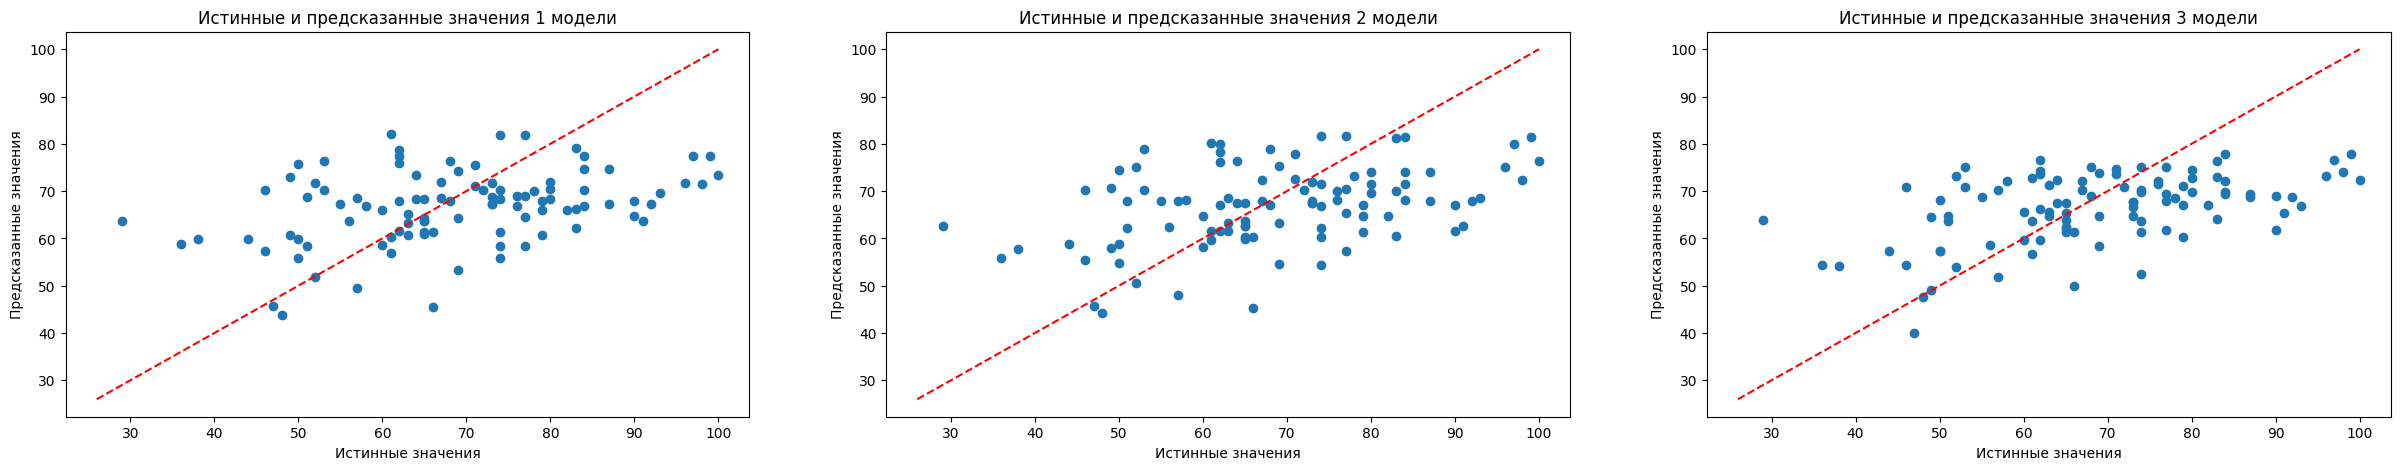

In [ ]:
plt.figure(figsize=(30, 5))

plt.subplot(1, 3, 1)
plt.scatter(result_df1['True_Score'][:100], result_df1['Predicted_Score'][:100])
plt.plot([min(result_df1['True_Score']), max(result_df1['True_Score'])],
         [min(result_df1['True_Score']), max(result_df1['True_Score'])],
         color='red', linestyle='--', label='Линия идеального совпадения')
plt.title('Истинные и предсказанные значения 1 модели')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')

plt.subplot(1, 3, 2)
plt.scatter(result_df2['True_Score'][:100], result_df2['Predicted_Score'][:100])
plt.plot([min(result_df2['True_Score']), max(result_df2['True_Score'])],
         [min(result_df2['True_Score']), max(result_df2['True_Score'])],
         color='red', linestyle='--', label='Линия идеального совпадения')
plt.title('Истинные и предсказанные значения 2 модели')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')

plt.subplot(1, 3, 3)
plt.scatter(result_df3['True_Score'][:100], result_df3['Predicted_Score'][:100])
plt.plot([min(result_df3['True_Score']), max(result_df3['True_Score'])],
         [min(result_df3['True_Score']), max(result_df3['True_Score'])],
         color='red', linestyle='--', label='Линия идеального совпадения')
plt.title('Истинные и предсказанные значения 3 модели')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')

По разным графикам трудно понять, значения какой модели находятся ближе к линии идеального совпадения.

Для наглядности был выведен график с значениями всех моделей.

Text(0, 0.5, 'Предсказанные значения')

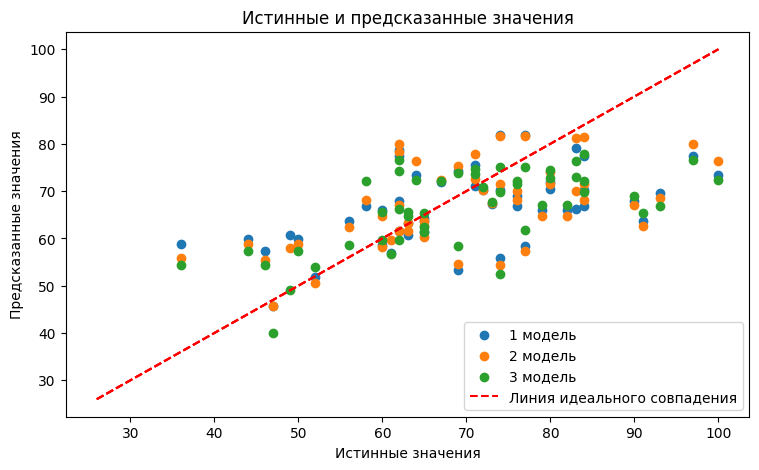

In [ ]:
plt.figure(figsize=(30, 5))

plt.subplot(1, 3, 1)
plt.scatter(result_df1['True_Score'][:50], result_df1['Predicted_Score'][:50], label="1 модель")
plt.plot([min(result_df1['True_Score']), max(result_df1['True_Score'])],
         [min(result_df1['True_Score']), max(result_df1['True_Score'])],
         color='red', linestyle='--')
plt.legend(loc='lower right')

plt.subplot(1, 3, 1)
plt.scatter(result_df2['True_Score'][:50], result_df2['Predicted_Score'][:50], label="2 модель")
plt.plot([min(result_df2['True_Score']), max(result_df2['True_Score'])],
         [min(result_df2['True_Score']), max(result_df2['True_Score'])],
         color='red', linestyle='--')
plt.legend(loc='lower right')

plt.subplot(1, 3, 1)
plt.scatter(result_df3['True_Score'][:50], result_df3['Predicted_Score'][:50], label="3 модель")
plt.plot([min(result_df3['True_Score']), max(result_df3['True_Score'])],
         [min(result_df3['True_Score']), max(result_df3['True_Score'])],
         color='red', linestyle='--', label='Линия идеального совпадения')
plt.legend(loc='lower right')

plt.title('Истинные и предсказанные значения')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')

Можно заметить, что значения 3 модели (зелёные точки) находятся ближе всего к линии идеального совпадения. Как и предполагалось, 3 модель точнее остальных совершила предсказание

### Графики средней абсолютной ошибки (mae)

Были построены графики средней абсолютной ошибки для каждой модели, общий для тренировочных значений, общий для валидационных значений и общий со всеми значениями.

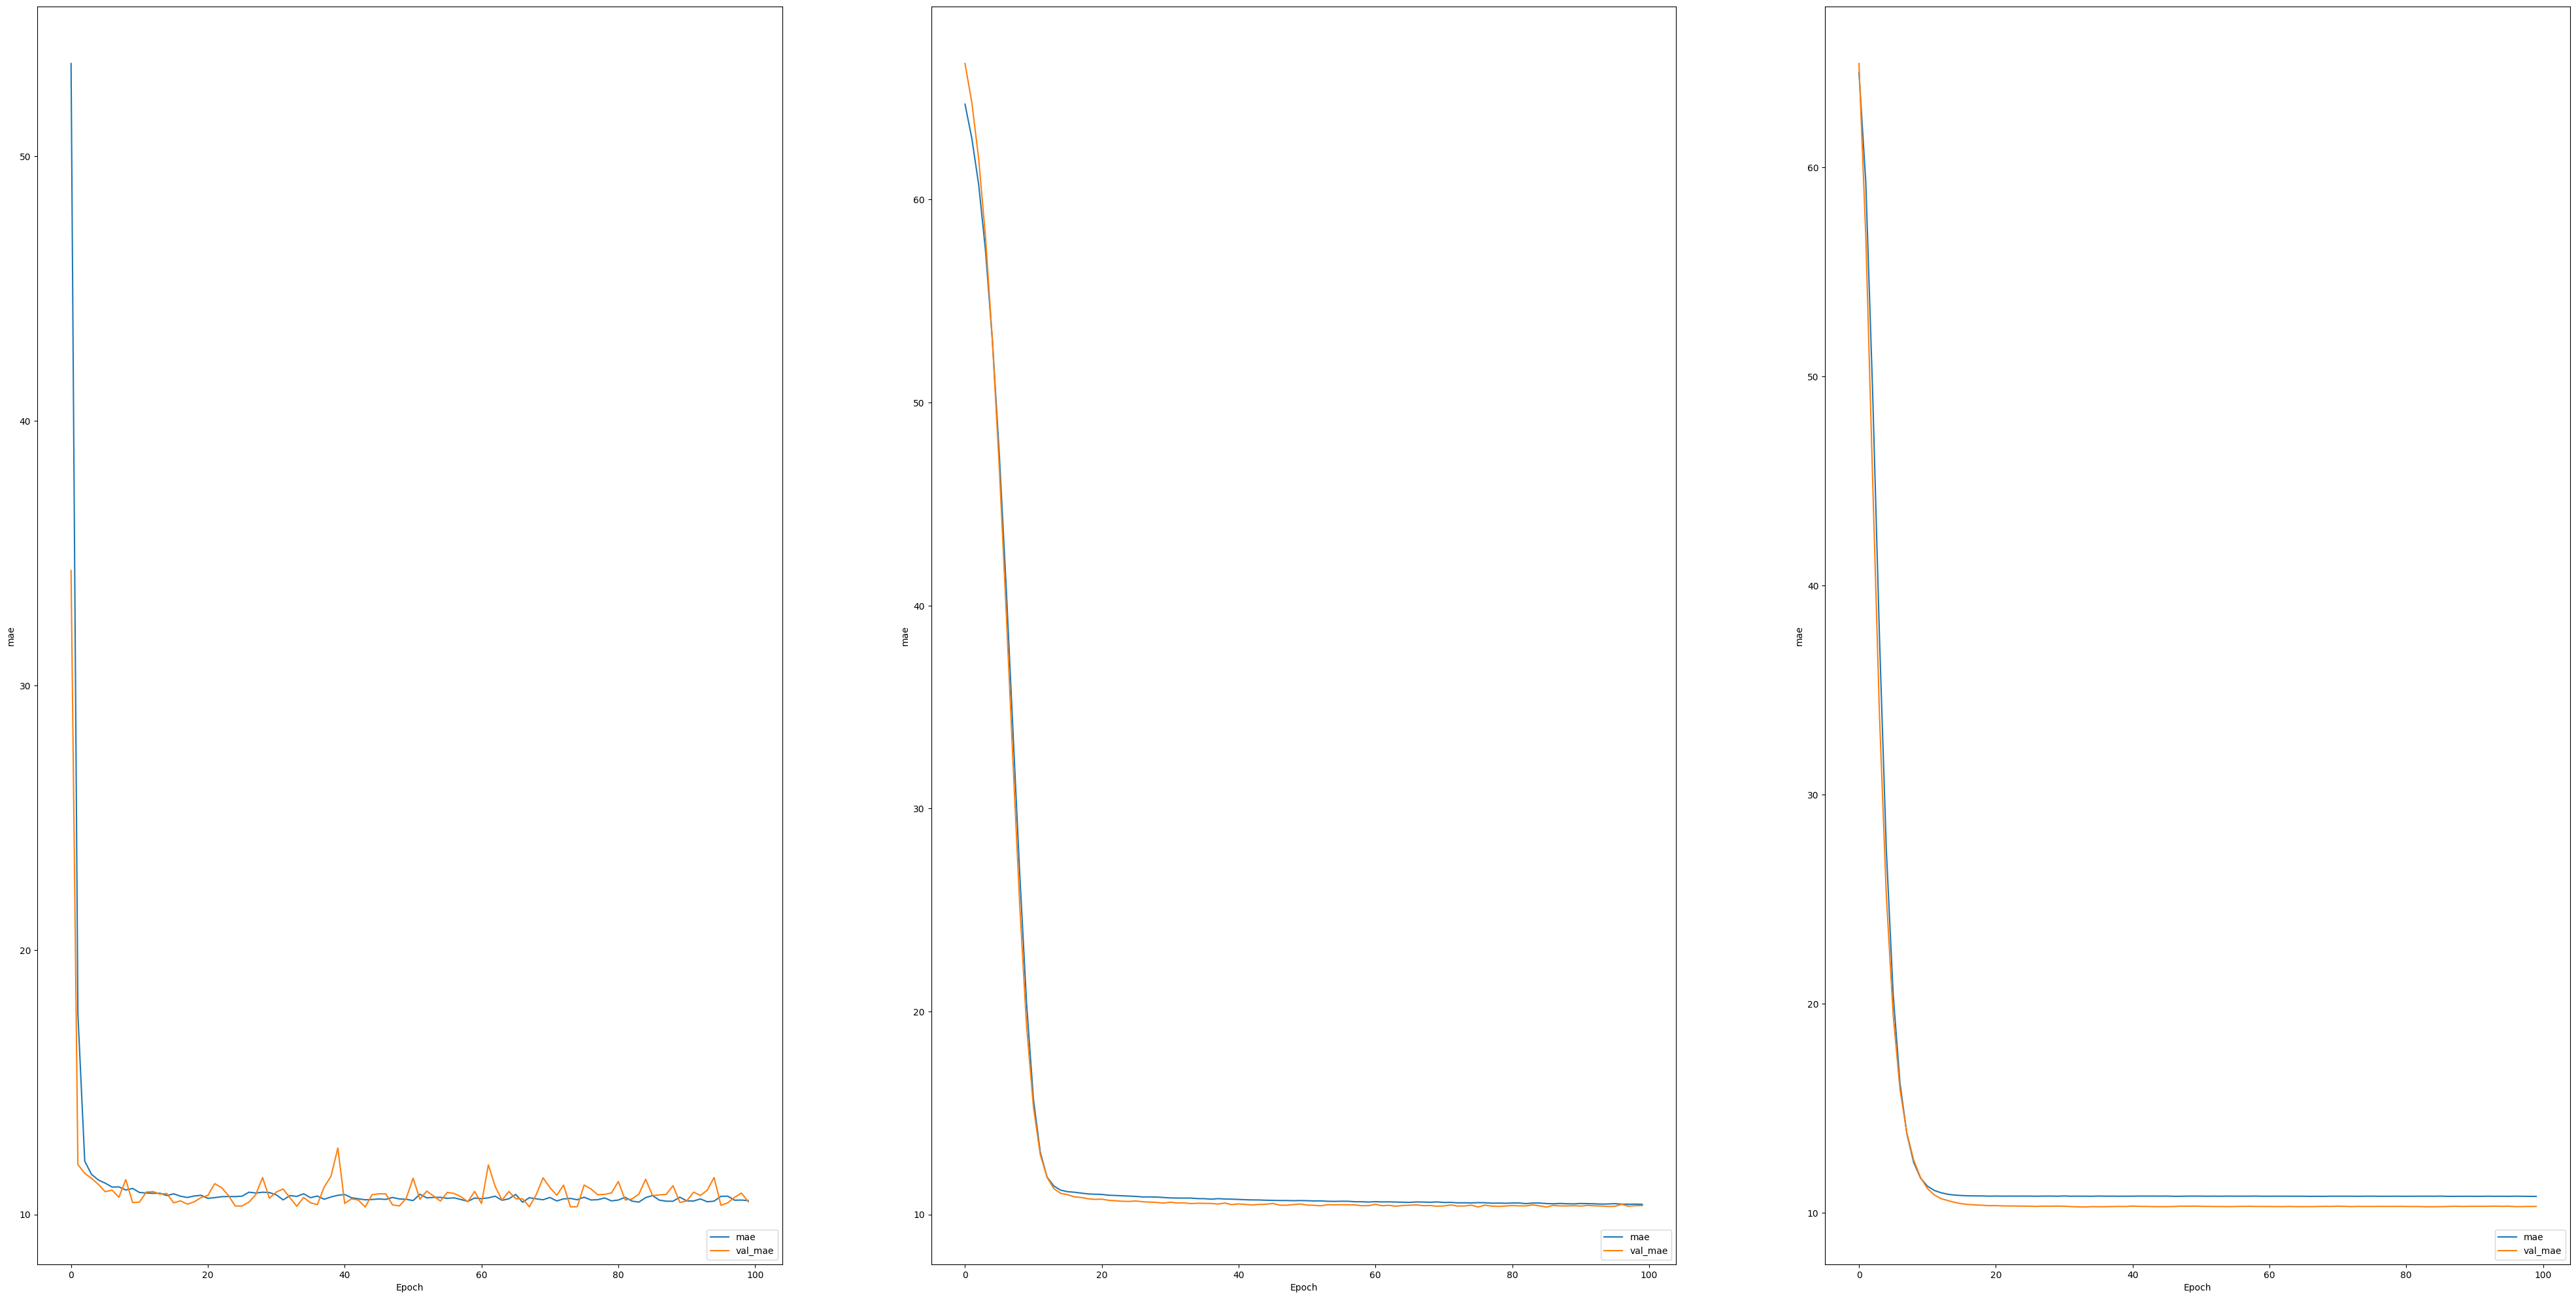

In [ ]:
plt.figure(figsize=(50,25))

plt.subplot(1, 3, 1)
plt.plot(history1.history['mae'], label='mae')
plt.plot(history1.history['val_mae'], label = 'val_mae')
plt.xlabel('Epoch')
plt.ylabel('mae')
plt.legend(loc='lower right')

plt.subplot(1, 3, 2)
plt.plot(history2.history['mae'], label='mae')
plt.plot(history2.history['val_mae'], label = 'val_mae')
plt.xlabel('Epoch')
plt.ylabel('mae')
plt.legend(loc='lower right')

plt.subplot(1, 3, 3)
plt.plot(history3.history['mae'], label='mae')
plt.plot(history3.history['val_mae'], label = 'val_mae')
plt.xlabel('Epoch')
plt.ylabel('mae')
plt.legend(loc='lower right')

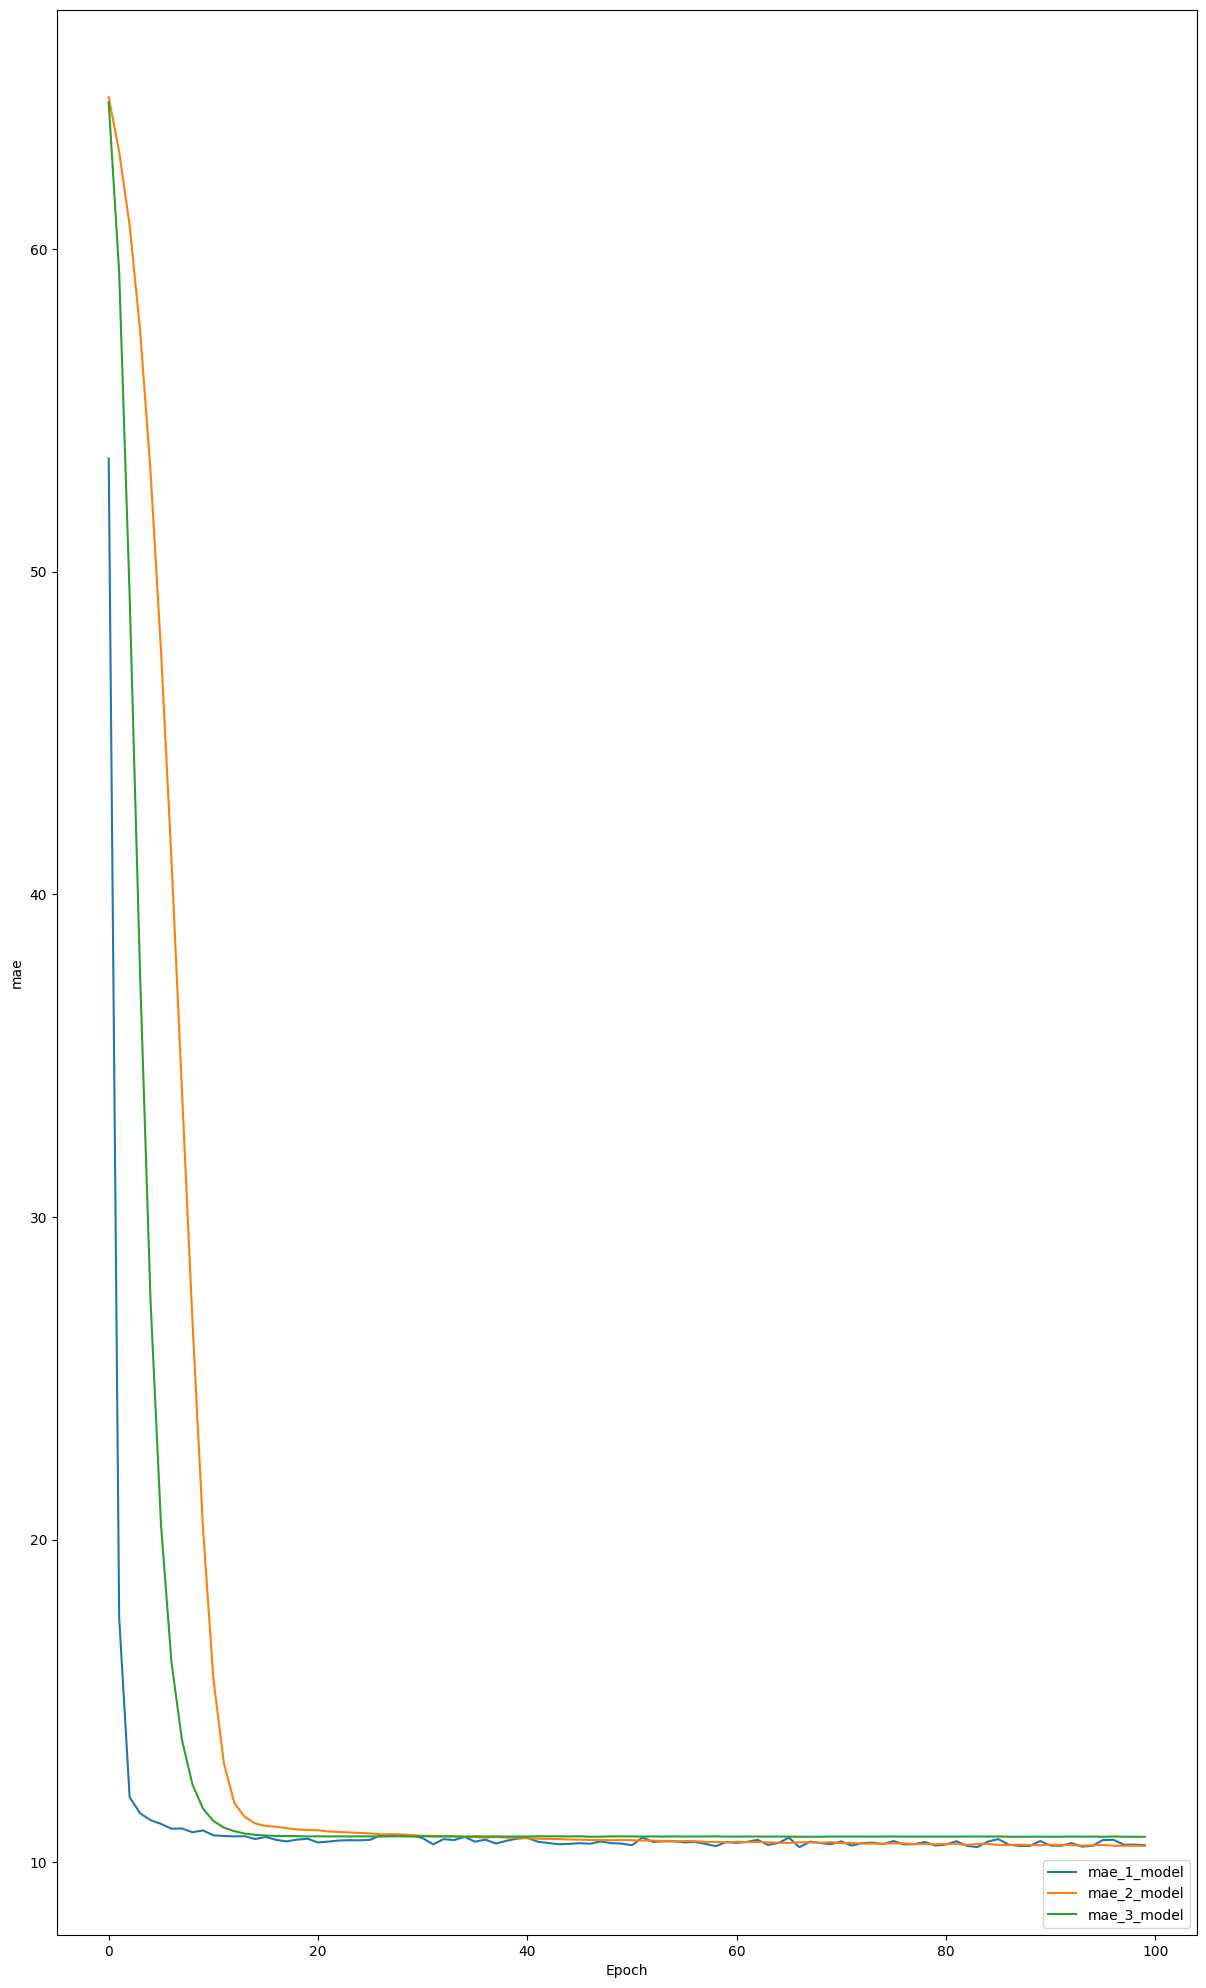

In [ ]:
plt.figure(figsize=(50,25))

plt.subplot(1, 3, 1)
plt.plot(history1.history['mae'], label='mae_1_model')
plt.xlabel('Epoch')
plt.ylabel('mae')
plt.legend(loc='lower right')

plt.subplot(1, 3, 1)
plt.plot(history2.history['mae'], label='mae_2_model')
plt.xlabel('Epoch')
plt.ylabel('mae')
plt.legend(loc='lower right')

plt.subplot(1, 3, 1)
plt.plot(history3.history['mae'], label='mae_3_model')
plt.xlabel('Epoch')
plt.ylabel('mae')
plt.legend(loc='lower right')

По тренировочным значениям можно сказать, что 2 модель спраляется лучше всех, но отрыв от 1 модели незначителен.

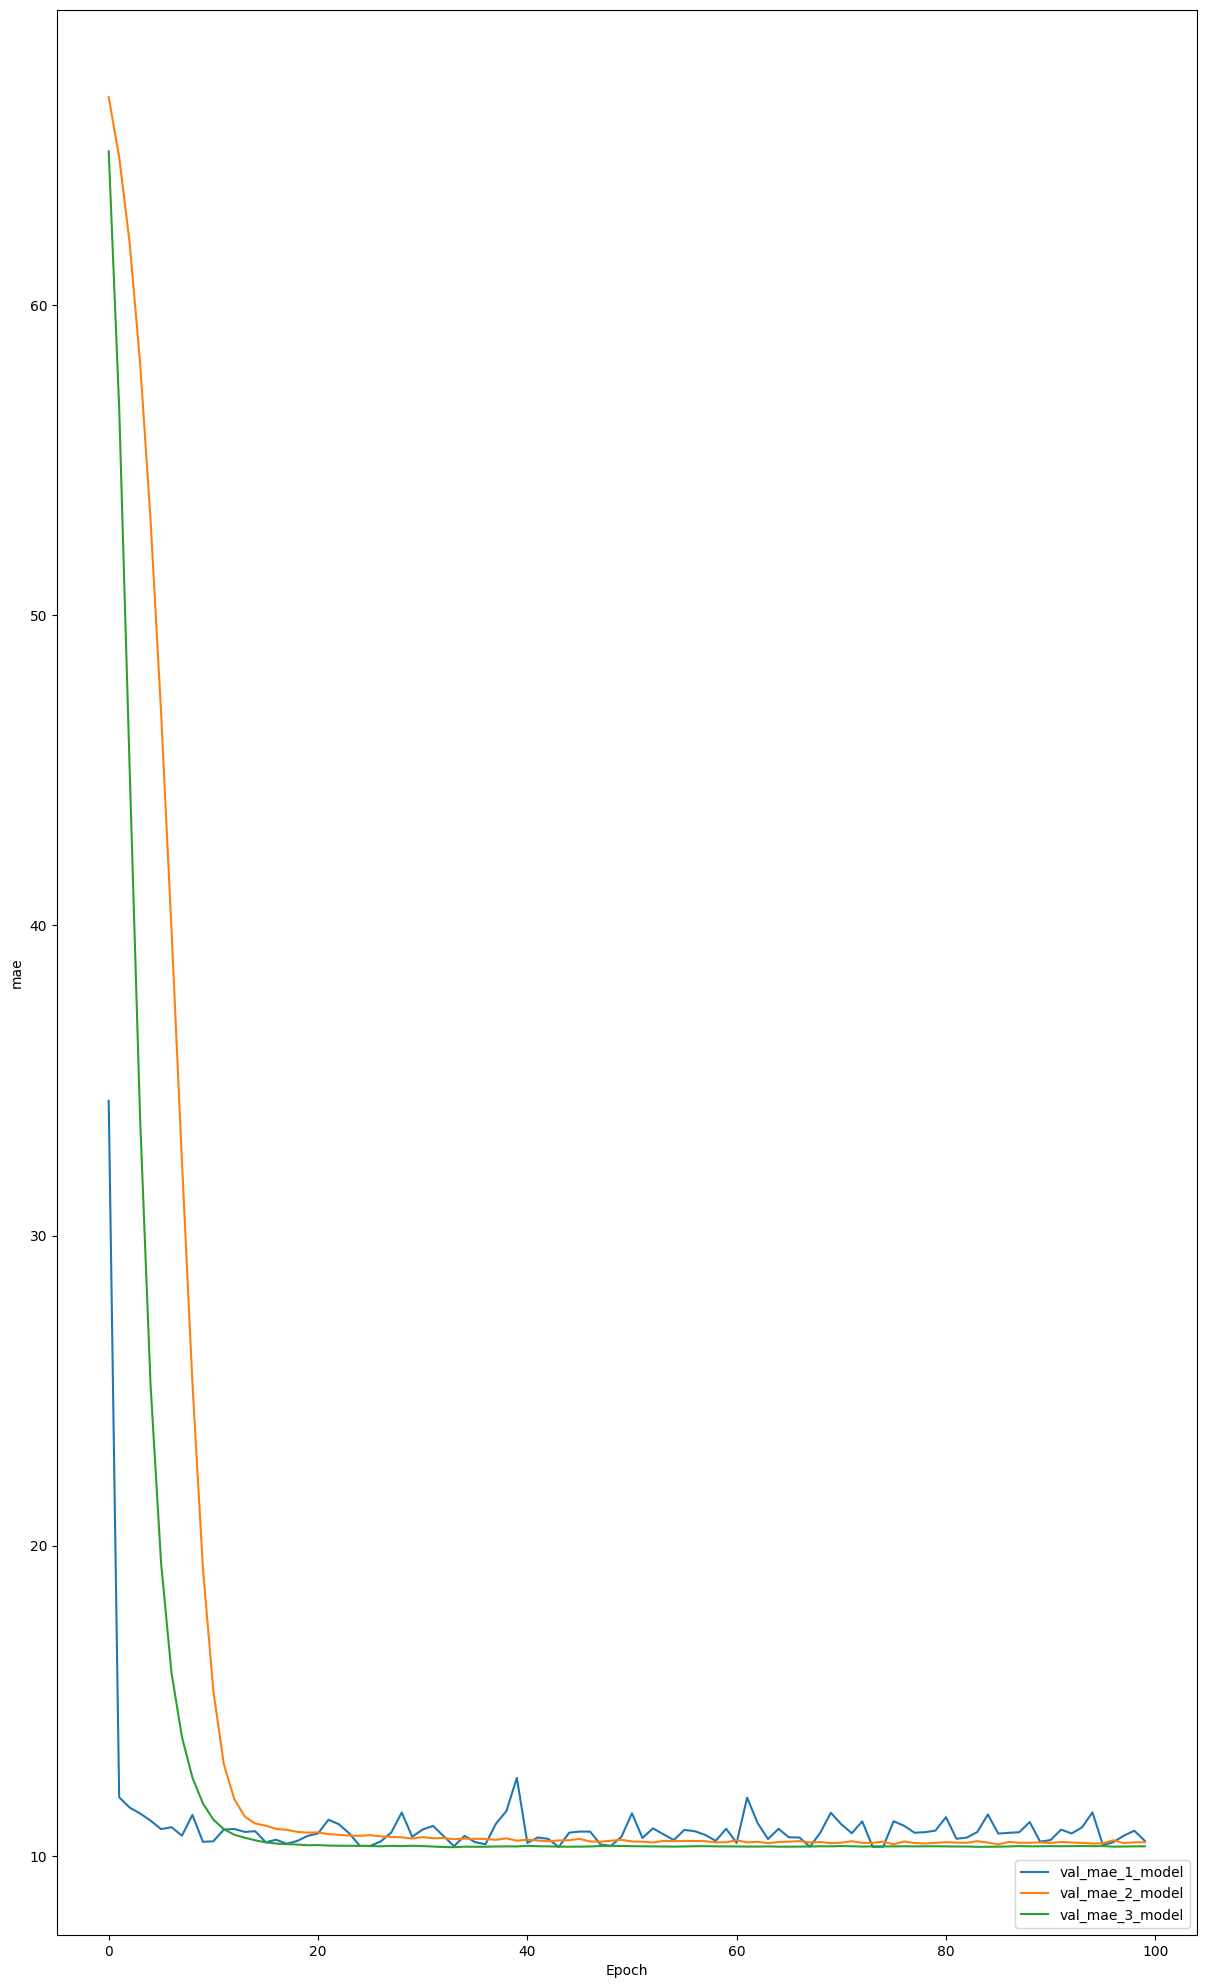

In [ ]:
plt.figure(figsize=(50,25))

plt.subplot(1, 3, 1)
plt.plot(history1.history['val_mae'], label = 'val_mae_1_model')
plt.xlabel('Epoch')
plt.ylabel('mae')
plt.legend(loc='lower right')

plt.subplot(1, 3, 1)
plt.plot(history2.history['val_mae'], label = 'val_mae_2_model')
plt.xlabel('Epoch')
plt.ylabel('mae')
plt.legend(loc='lower right')

plt.subplot(1, 3, 1)
plt.plot(history3.history['val_mae'], label = 'val_mae_3_model')
plt.xlabel('Epoch')
plt.ylabel('mae')
plt.legend(loc='lower right')

В валидационных данных лидирует 3 модель. На втором месте - вторая модель.

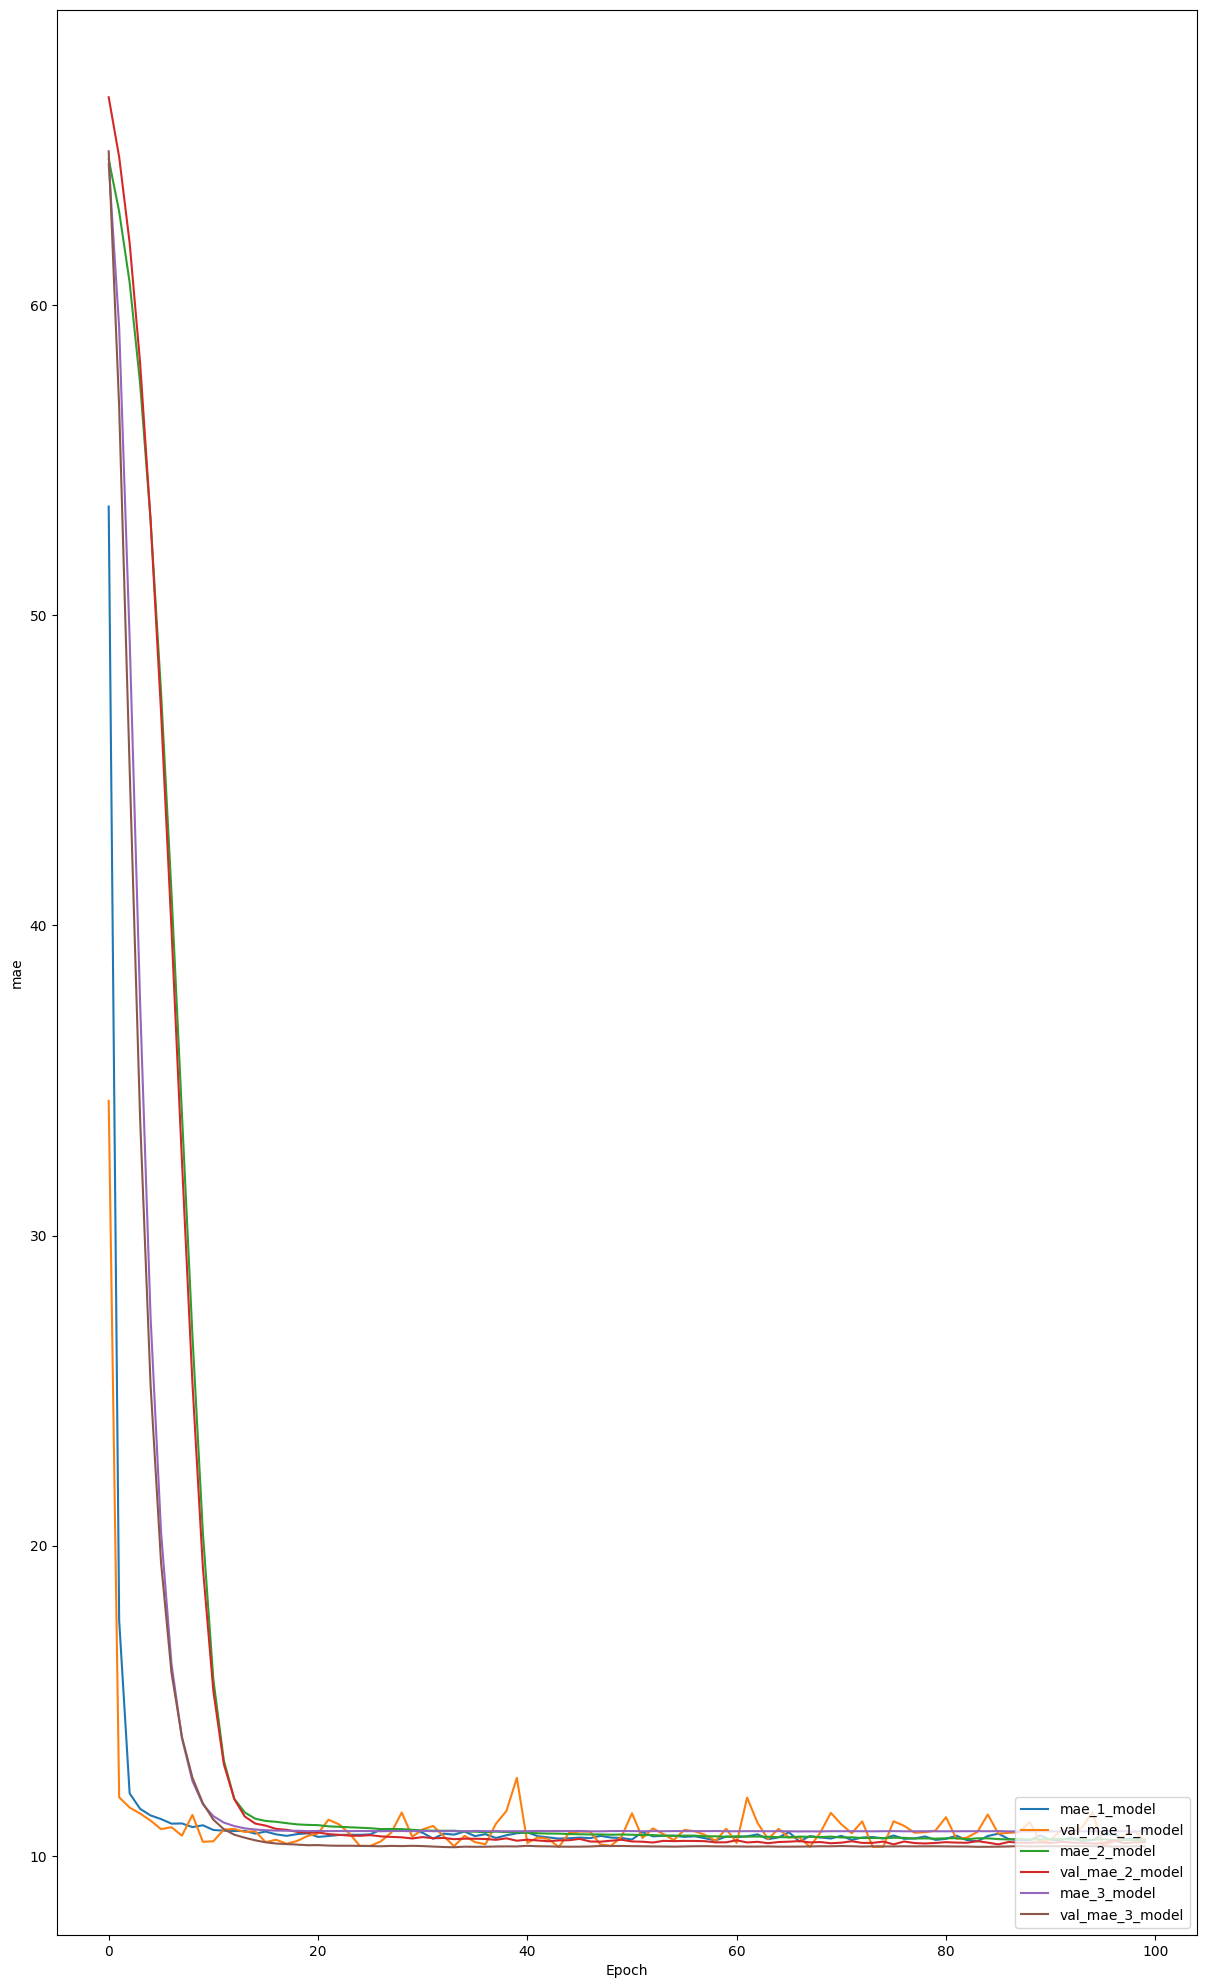

In [ ]:
plt.figure(figsize=(50,25))

plt.subplot(1, 3, 1)
plt.plot(history1.history['mae'], label='mae_1_model')
plt.plot(history1.history['val_mae'], label = 'val_mae_1_model')
plt.xlabel('Epoch')
plt.ylabel('mae')
plt.legend(loc='lower right')

plt.subplot(1, 3, 1)
plt.plot(history2.history['mae'], label='mae_2_model')
plt.plot(history2.history['val_mae'], label = 'val_mae_2_model')
plt.xlabel('Epoch')
plt.ylabel('mae')
plt.legend(loc='lower right')

plt.subplot(1, 3, 1)
plt.plot(history3.history['mae'], label='mae_3_model')
plt.plot(history3.history['val_mae'], label = 'val_mae_3_model')
plt.xlabel('Epoch')
plt.ylabel('mae')
plt.legend(loc='lower right')

Самый нижний валидационный график - график 3 модели. Это значит, что третья модель реже всех остальных ошибается в предсказании реальных значений.

### Графики средней квадратичной ошибки (mse)

Были построены графики средней квадратичной ошибки для каждой модели, общий для тренировочных значений, общий для валидационных значений и общий со всеми значениями.

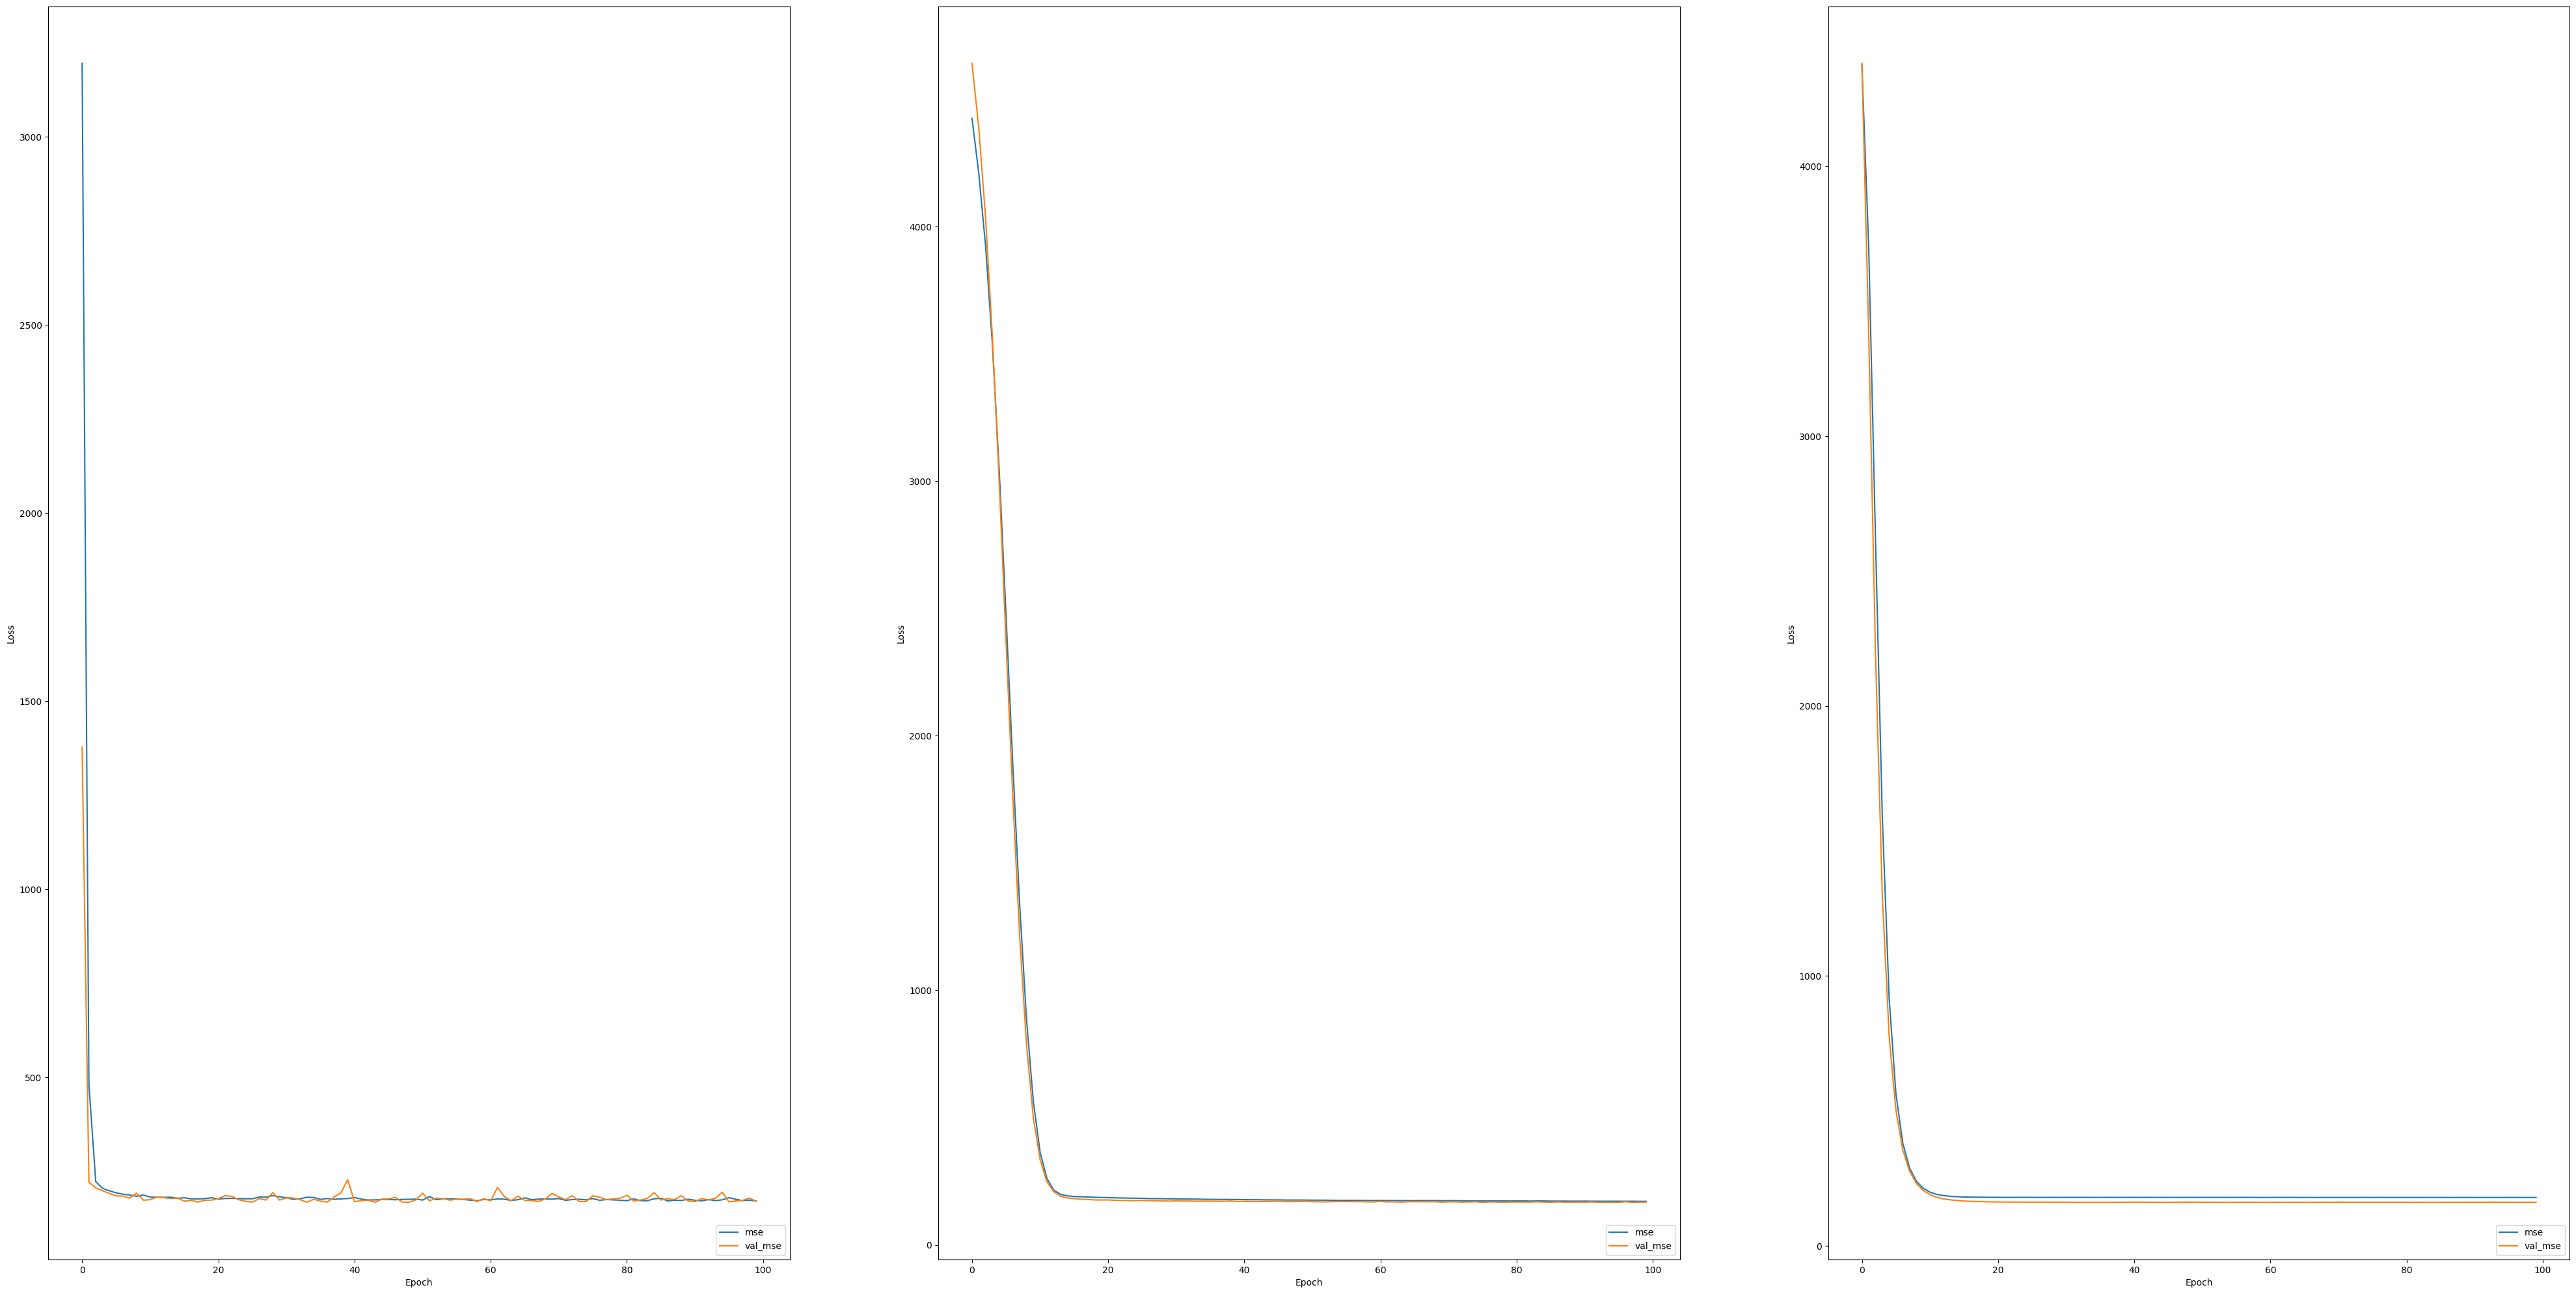

In [ ]:
plt.figure(figsize=(50,25))

plt.subplot(1, 3, 1)
plt.plot(history1.history['loss'], label='mse')
plt.plot(history1.history['val_loss'], label = 'val_mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

plt.subplot(1, 3, 2)
plt.plot(history2.history['loss'], label='mse')
plt.plot(history2.history['val_loss'], label = 'val_mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

plt.subplot(1, 3, 3)
plt.plot(history3.history['loss'], label='mse')
plt.plot(history3.history['val_loss'], label = 'val_mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

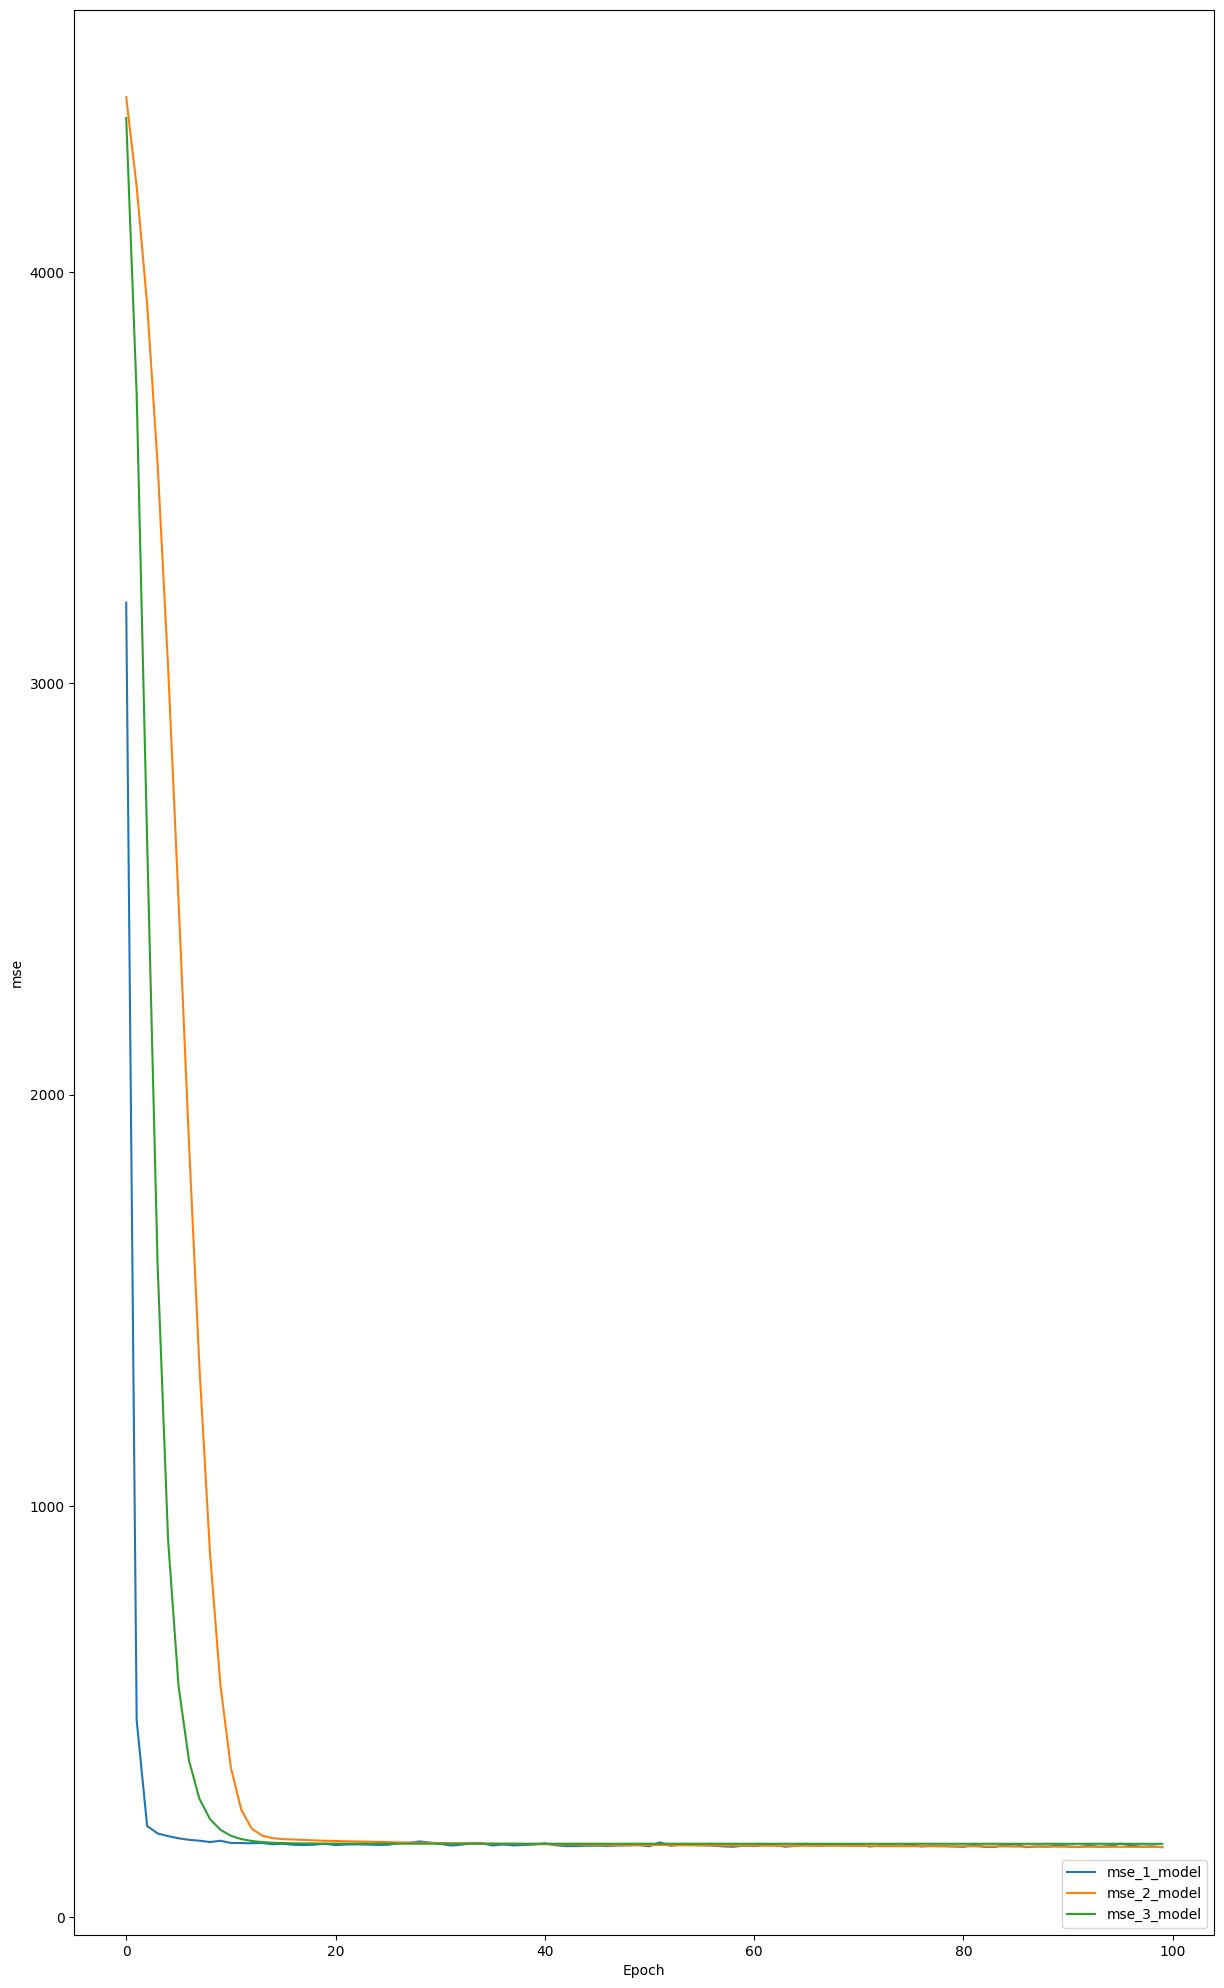

In [ ]:
plt.figure(figsize=(50,25))

plt.subplot(1, 3, 1)
plt.plot(history1.history['loss'], label='mse_1_model')
plt.xlabel('Epoch')
plt.ylabel('mse')
plt.legend(loc='lower right')

plt.subplot(1, 3, 1)
plt.plot(history2.history['loss'], label='mse_2_model')
plt.xlabel('Epoch')
plt.ylabel('mse')
plt.legend(loc='lower right')

plt.subplot(1, 3, 1)
plt.plot(history3.history['loss'], label='mse_3_model')
plt.xlabel('Epoch')
plt.ylabel('mse')
plt.legend(loc='lower right')

По тренировочным значениям можно сказать, что 2 модель спраляется лучше всех, но отрыв от остальных моделей незначителен.

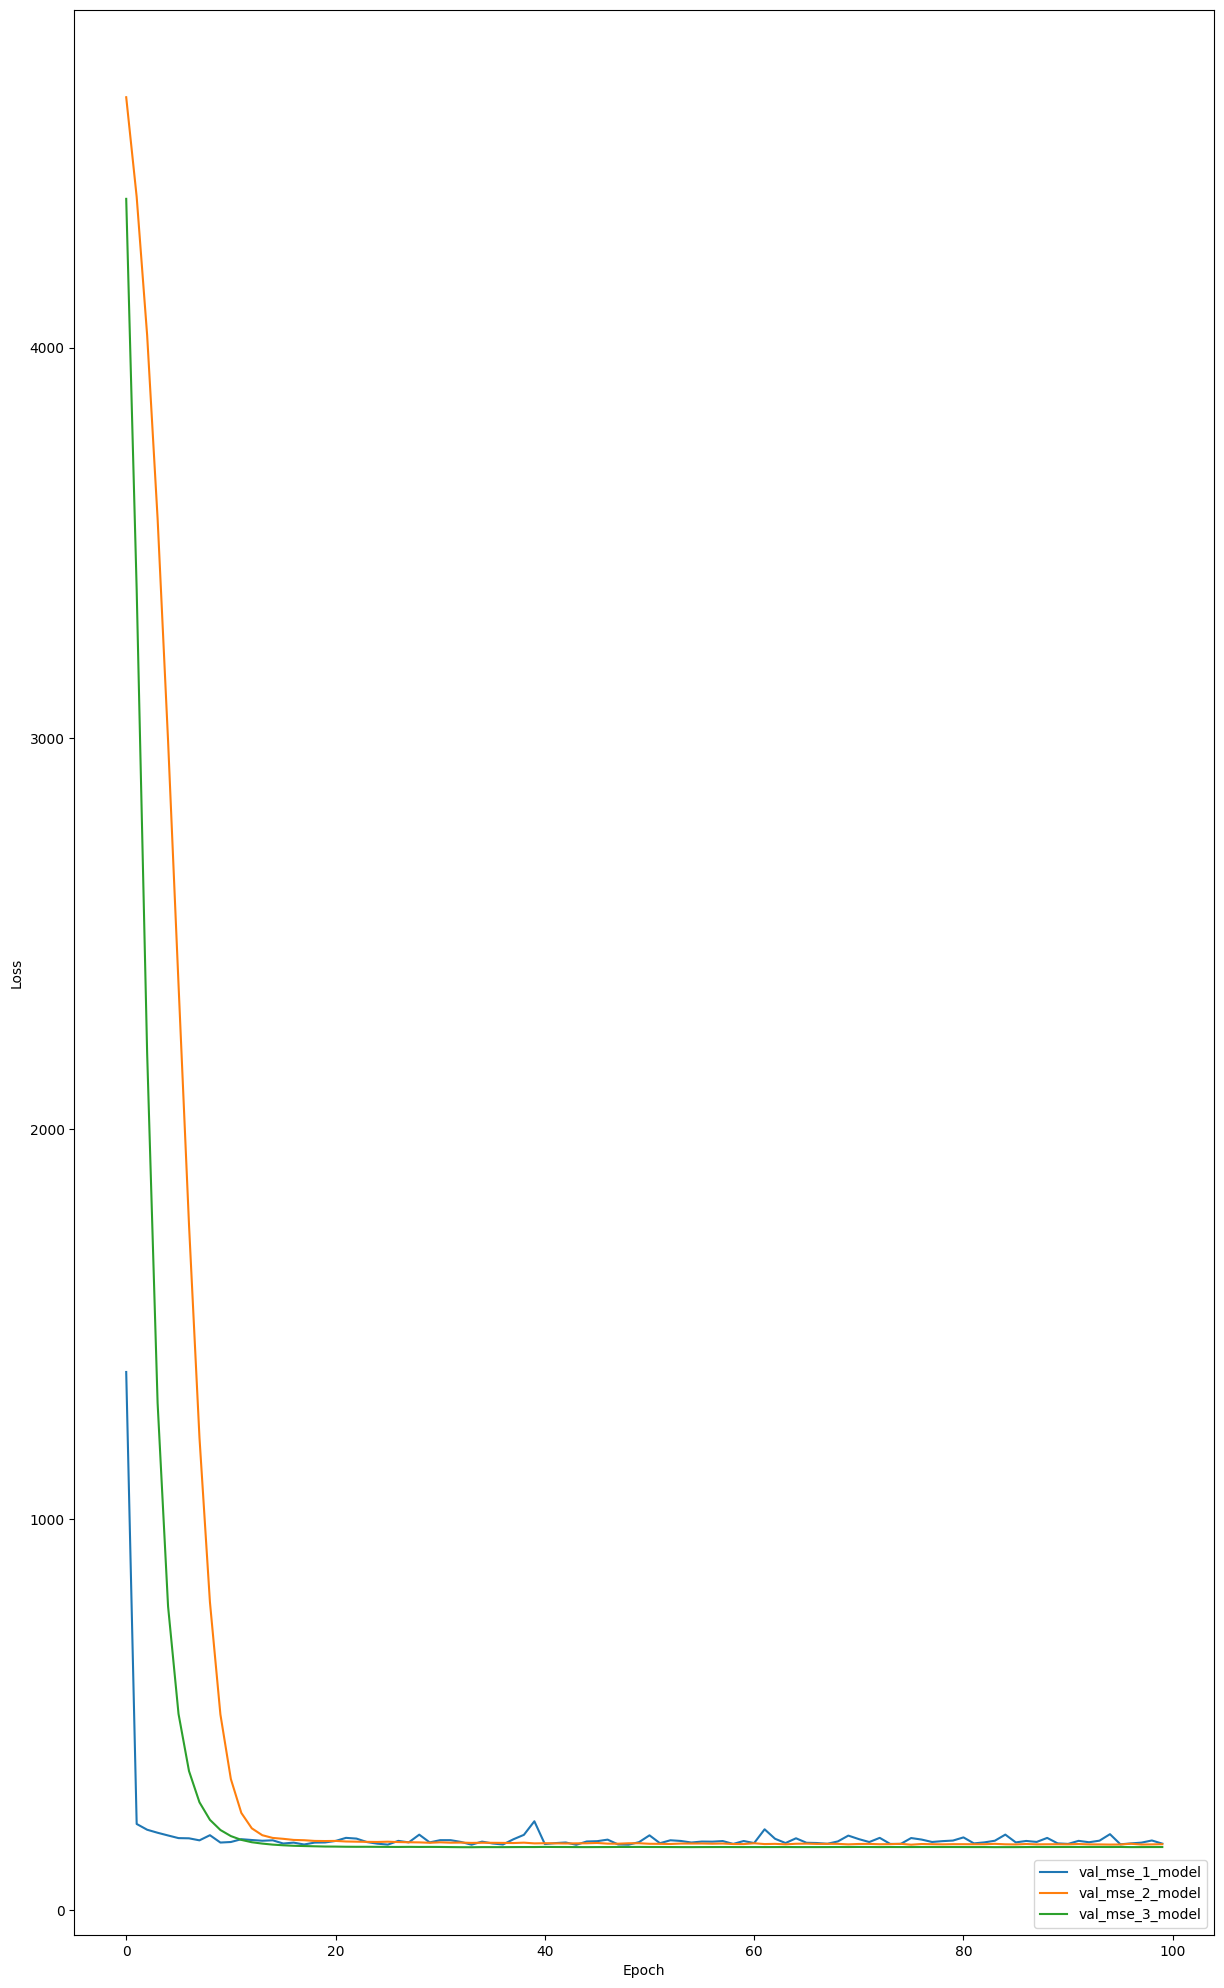

In [ ]:
plt.figure(figsize=(50,25))

plt.subplot(1, 3, 1)
plt.plot(history1.history['val_loss'], label = 'val_mse_1_model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

plt.subplot(1, 3, 1)
plt.plot(history2.history['val_loss'], label = 'val_mse_2_model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

plt.subplot(1, 3, 1)
plt.plot(history3.history['val_loss'], label = 'val_mse_3_model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

В валидационных данных лидирует 3 модель. На втором месте - вторая модель.

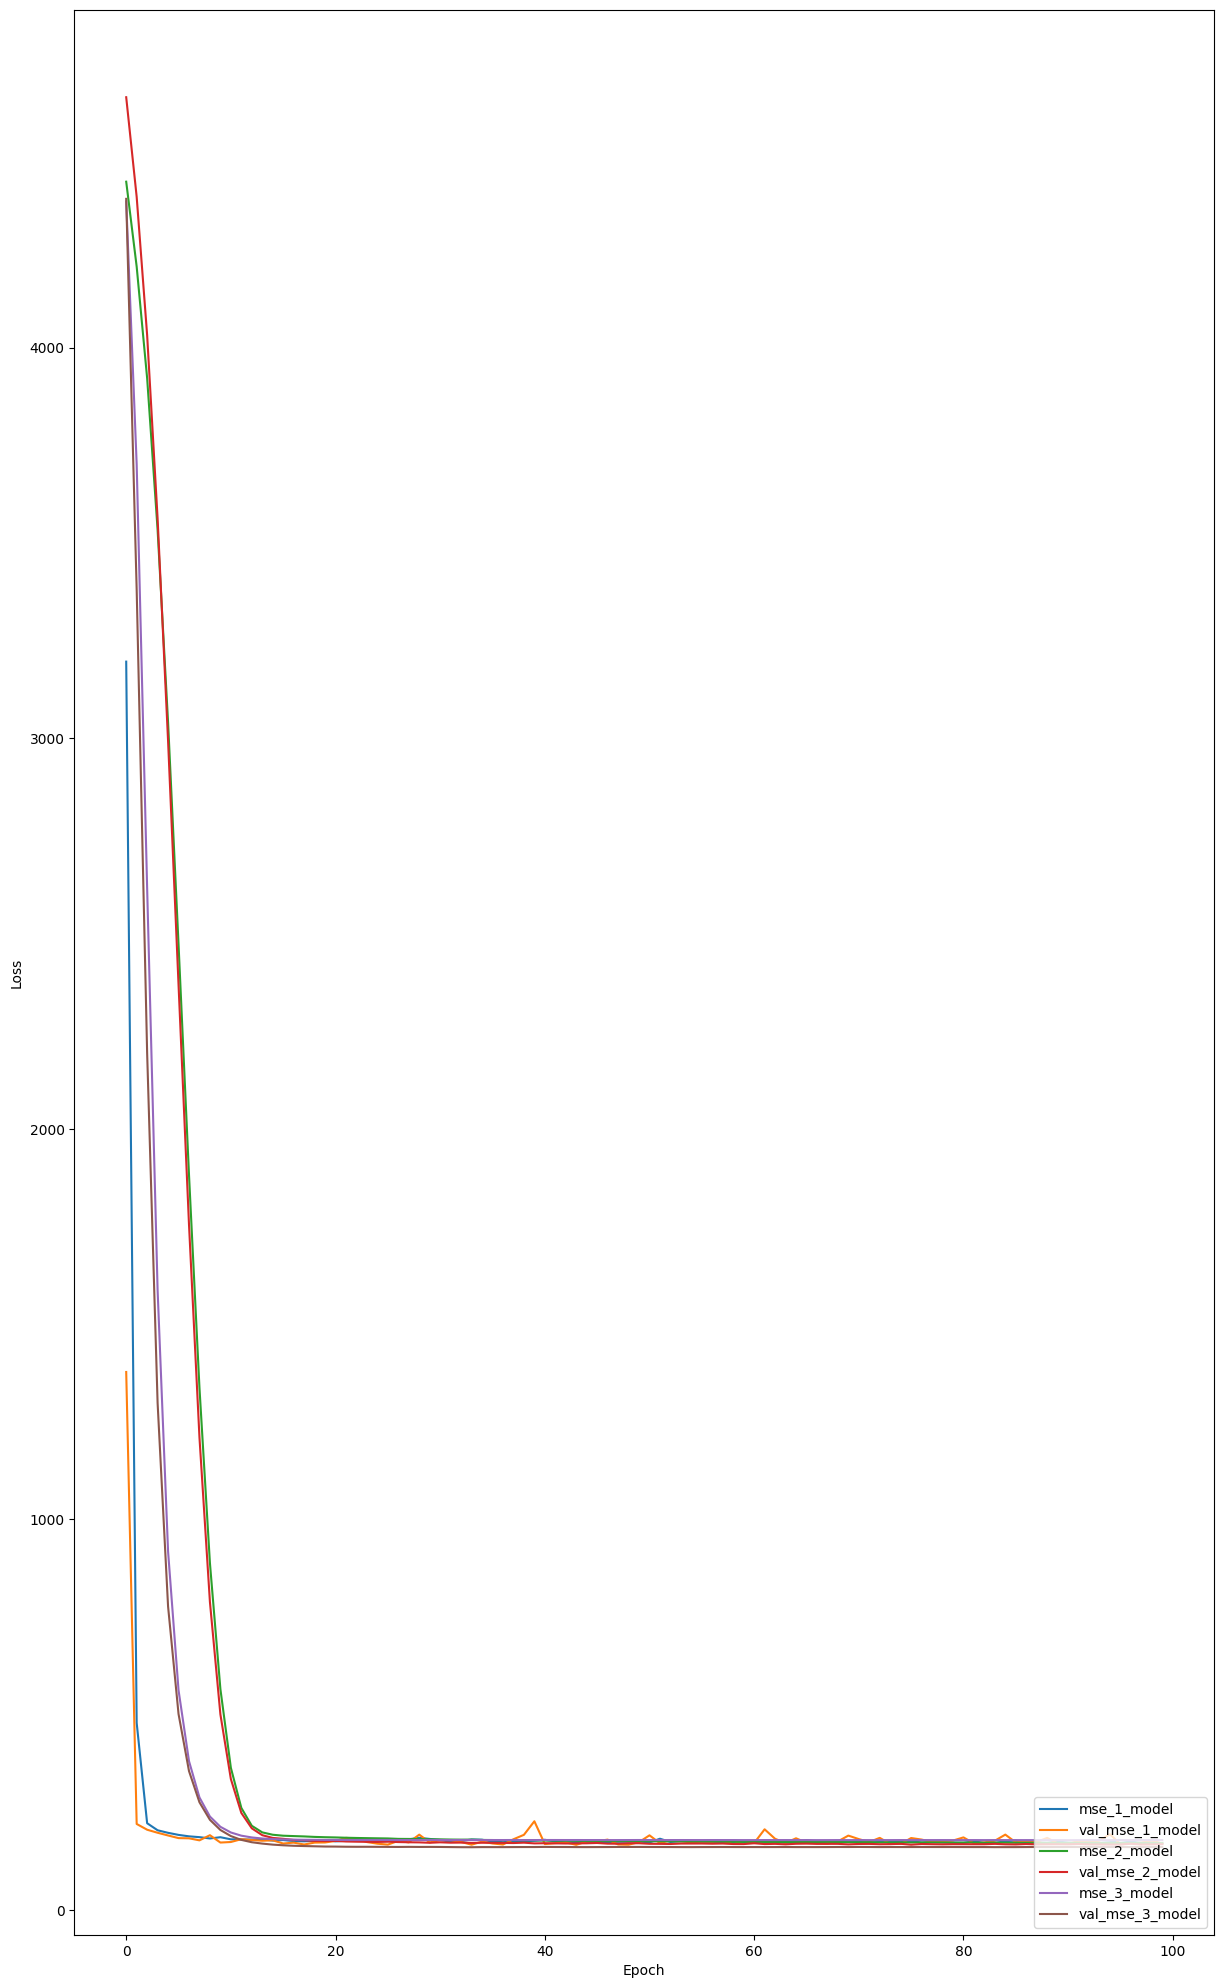

In [ ]:
plt.figure(figsize=(50,25))

plt.subplot(1, 3, 1)
plt.plot(history1.history['loss'], label='mse_1_model')
plt.plot(history1.history['val_loss'], label = 'val_mse_1_model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

plt.subplot(1, 3, 1)
plt.plot(history2.history['loss'], label='mse_2_model')
plt.plot(history2.history['val_loss'], label = 'val_mse_2_model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

plt.subplot(1, 3, 1)
plt.plot(history3.history['loss'], label='mse_3_model')
plt.plot(history3.history['val_loss'], label = 'val_mse_3_model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

Самый нижний валидационный график - график 3 модели. Это значит, что третья модель реже всех остальных ошибается в предсказании реальных значений.

### Вывод

После анализа полученных предсказаний и графиков, можно сказать, что лучшей моделью из представленных является 3 модель. Стоит заметить, что отрыв от остальных моделей незначителен.

3 модель имела значение optimizer = Adagrad и activation = tanh.



В данной модели присутствует 3 слоя: 1 входной, 1 скрытый и 1 выходной.

Был использован слой Dense – полносвязный слой (каждый нейрон данной слоя связан с каждым нейроном предыдущего/следующего слоя).

* Первый параметр слоя – units, данный параметр задаёт кол-во нейронов слое, в данном случае у первого слоя 2000 нейронов, у второго 1200, у третьего 1.
* Второй параметр activation – параметр, задающий функцию активации нейронов, у первого и второго слоя функция активации – tanh.
* Крайний параметр input_shape – параметр, отвечающий за размер входных данных, в данном случае на вход каждого нейрона первого слоя подаётся массив размера (800, 5).








Количество эпох при обучении модели равно 100.

# Вывод

В ходе лабораторной работы были изучены простые полносвязные нейронные сети, а именно нейронные сети для выполнения задач классификации и регрессии.

Работа по полносвязным нейронным сетям включает в себя следующие этапы:

1. Подготовка данных: сначала необходимо подготовить данные для обучения сети, включая их предобработку, нормализацию и разделение на обучающую и тестовую выборки.

2. Определение архитектуры сети: выбор числа слоев, числа нейронов в каждом слое, функций активации и других параметров, которые определяют структуру нейронной сети.

3. Обучение сети: используя обучающий набор данных, сеть обучается путем минимизации функции потерь с помощью метода обратного распространения ошибки.

4. Оценка производительности: после обучения сети оценивается ее производительность на тестовом наборе данных, чтобы определить точность и другие метрики качества модели.

5. Корректировка модели. На основании качества предсказания, происходит настройка ответственных параметров: количества эпох, нейронов и слоёв.

Эти шаги составляют общий процесс работы по полносвязным нейронным сетям, который может быть адаптирован и расширен в зависимости от конкретной задачи и данных.

С помощью библиотеки TensorFlow была создана нейронная сеть, способная предсказывать оценку за экзамен по математике, основываясь на образовании родителей, расе, виду завтрака и прохождении подготовительного курса.

Также, аналогчино была создана нейросеть-классификатор, способная определять болезнь сердца у людей.

На основе проведенных исследований, было установлено:

*   Нейронные сети представляют собой удобный способ нахождения зависимостей между данными и выполения предсказаний на основе уже известной информации.

* Нейронные сети могут быть применены в различных индустриях (медицина, наука, социология, экономика)
